# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Akshat Johari  

EID: aj32864

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

Loss if $C_1$ is chosen:  
$$ 0 * P(C_1|x) + 4 * (1- P(C_1|x)) $$
$$ = 4 - 4P(C_1|x) $$  

Loss is $C_2$ is chosen:  
$$ 2 * P(C_1|x) + 0 * (1 - P(C_1|x)) $$
$$ = 2 P(C_1|x) $$

Loss if Rejected:
$$ c * P(C_1|x) + c * (1 - P(C_1|x)) $$
$$ = 1 $$

Decision boundaries are given as: 


Select Class 1 where 
$$ E[L_1] < E[L_R] $$  

$$ 4 - 4 P(C1|x) < 1 $$
$$ P(C_1|x) > \frac{3}{4} $$

Select Class 2 where
$$ E[L_2] < E[L_R] $$  

$$ 2 P(C1|x) < 1 $$
$$ P(C_1|x) < \frac{1}{2} $$

Reject between these 2 decision boundaries.

Therefore,  

<center>Prediction = <center> 
$$ C_1 \space \space  \forall \space \space  P(C_1|x) > \frac{3}{4} $$  
    
$$ C_2  \space \space \forall  \space \space P(C_1|x) < \frac{1}{2} $$  
    
$$ Reject \space \space \forall \space \space  P(C_1|x) \in (\frac{1}{2}, \frac{3}{4}) $$

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [1]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

#### Part a

In [2]:
import sklearn.linear_model as lm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
model = lm.LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



#### Part b

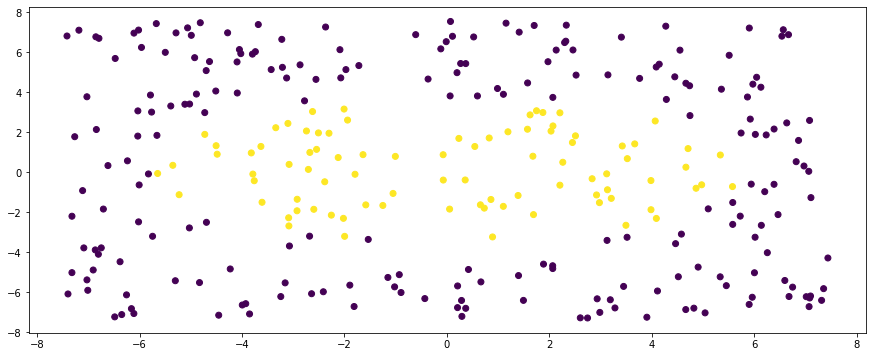

In [4]:
plt.figure(figsize = [15,6])
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

Logistic regression utilizes a linear separator, which is not very good at differentiating this data - you can see the distribution is centered around (0,0) in a somewhat ring-like fashion. I decided to transform this data by taking the square of each point.

#### Part c

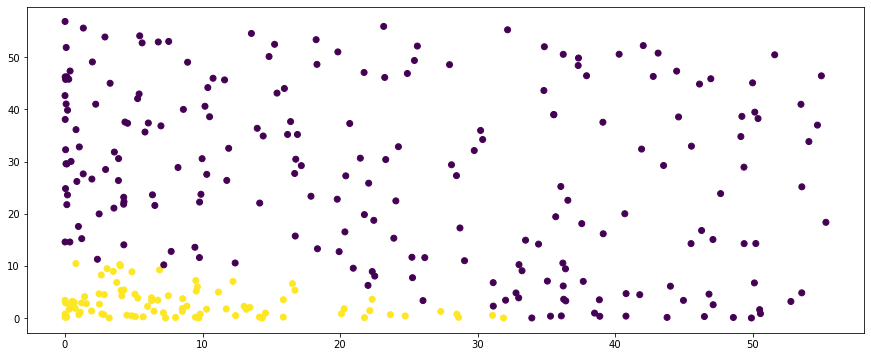

In [5]:
X_train_transformed = X_train ** 2
X_test_transformed = X_test ** 2

plt.figure(figsize = [15,6])
plt.scatter(X_train_transformed[:,0], X_train_transformed[:,1], c = y_train)

In [6]:
model = lm.LogisticRegression().fit(X_train_transformed, y_train)
y_pred_transformed = model.predict(X_test_transformed)
print(metrics.classification_report(y_test, y_pred_transformed))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Precision is defined as $ \frac{tp}{tp + fp} $   

Recall is given by $ \frac {tp}{tp + fn} $  

F-1 score is a weighted average of recall and precision, given by $ \frac {2 * recall * precision}{recall + precision} $  

Our goal in classification is to get both a high accuracy and a high F-1 score. Initially, accuracy was at 69% and F-1 score at 82% for the Positive class, and 0 for the negative.  

After the square transformation, accuracy and F-1 scores are up to 100%

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [7]:
%%html
<iframe src="https://drive.google.com/file\
/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


#### P(A,B,C,D,E,F) = P(A) P(B|A) P(D|B) P(E|B) P(C|A,E) P(F|C,D,E)

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

#### Part a

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec
import warnings
import matplotlib.pyplot as plt
from statsmodels import robust
warnings.filterwarnings('ignore')

In [9]:
class Classifiers():
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def RandomForest(self, max_depth, min_samples_split, n_estimators):
        self.rf = RandomForestClassifier(max_depth = max_depth, min_samples_split = min_samples_split, 
                                         n_estimators = n_estimators)
        self.rf.fit(self.X_train, self.y_train)
        y_pred = self.rf.predict(self.X_test)
        y_train_pred = self.rf.predict(self.X_train)
        return(accuracy_score(y_train_pred, self.y_train), accuracy_score(y_pred, self.y_test))
    
    def MLP(self):
        self.mlp = MLPClassifier()
        self.mlp.fit(self.X_train, self.y_train)
        y_pred = self.mlp.predict(self.X_test)
        y_train_pred = self.mlp.predict(self.X_train)
        return(accuracy_score(y_train_pred, self.y_train), accuracy_score(y_pred, self.y_test))
    
    def LogisticRegression(self, c):
        self.lr = LogisticRegression(C = c)
        self.lr.fit(self.X_train, self.y_train)
        y_pred = self.lr.predict(self.X_test)
        y_train_pred = self.lr.predict(self.X_train)
        return(accuracy_score(y_train_pred, self.y_train), accuracy_score(y_pred, self.y_test))
    
    def calibration(self, data):
        fig = plt.figure(figsize=(15, 15))
        gs = GridSpec(4, 2)
        colors = plt.cm.get_cmap("Dark2")
        ax_calibration_curve = fig.add_subplot(gs[:2, :2])
        calibration_displays = {}
        lst = [self.lr, self.mlp, self.rf]
        for i,j in enumerate(lst):
            display = CalibrationDisplay.from_estimator(j, self.X_test, self.y_test, n_bins = 10, 
                                                        ax = ax_calibration_curve, color = colors(i))
        ax_calibration_curve.grid()
        ax_calibration_curve.set_title("Calibration plots for " + data)

In [10]:
# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

results_db = pd.DataFrame(columns = ['Train Accuracy', 'Test Accuracy'], index = ['Random Forest', 'MLP', 
                                                                               'Logistic Regression'])

var_db = Classifiers(X_train, X_test, y_train, y_test)
results_db.loc['Random Forest'] = var_db.RandomForest(4,4,50)
results_db.loc['MLP'] = var_db.MLP()
results_db.loc['Logistic Regression'] = var_db.LogisticRegression(0.1)

In [11]:
print('\nResults for Pima Diabetes Dataset:')
results_db


Results for Pima Diabetes Dataset:


Train Accuracy Test Accuracy
Random Forest             0.830739      0.751969
MLP                       0.770428      0.712598
Logistic Regression       0.782101      0.748031

In [12]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    df = df.astype('int64')
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

results_ac = pd.DataFrame(columns = ['Train Accuracy', 'Test Accuracy'], index = ['Random Forest', 'MLP', 
                                                                               'Logistic Regression'])

var_ac = Classifiers(X_train2, X_test2, y_train2, y_test2)
results_ac.loc['Random Forest'] = var_ac.RandomForest(15, 10, 50)
results_ac.loc['MLP'] = var_ac.MLP()
results_ac.loc['Logistic Regression'] = var_ac.LogisticRegression(10)

In [13]:
print('\nResults for Adult Census Dataset:')
results_ac


Results for Adult Census Dataset:


Train Accuracy Test Accuracy
Random Forest              0.88595      0.861809
MLP                       0.792895      0.796855
Logistic Regression       0.792391      0.795273

#### Part b 

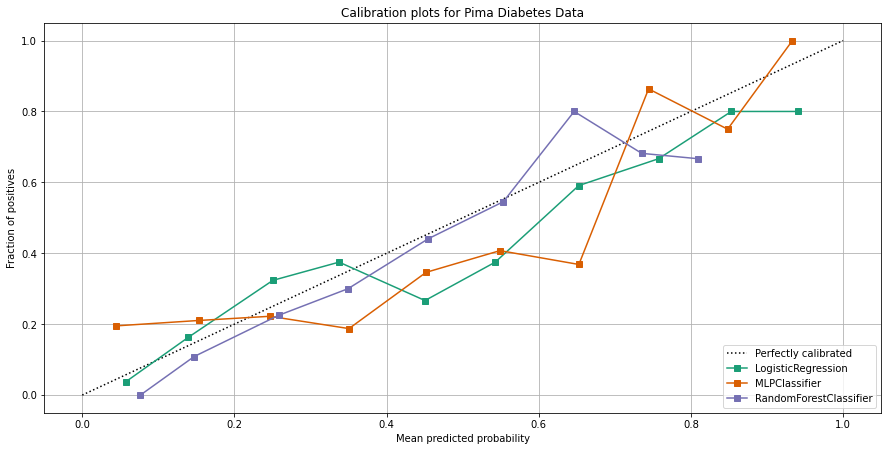

In [14]:
var_db.calibration('Pima Diabetes Data')

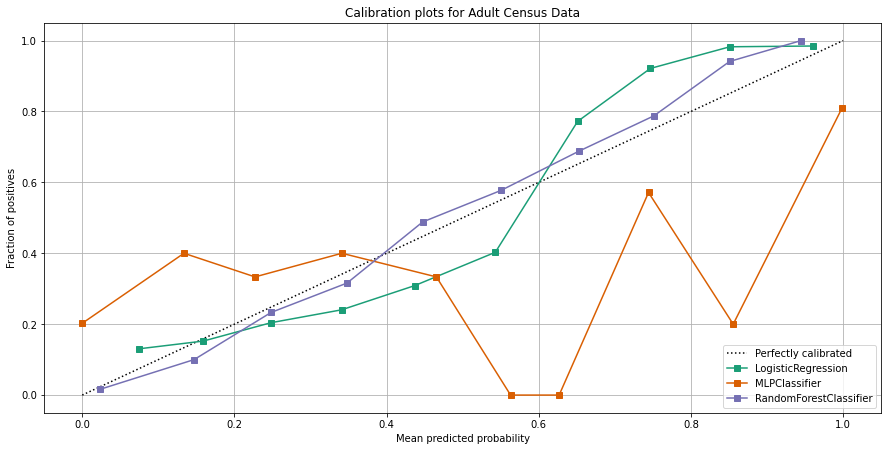

In [15]:
var_ac.calibration('Adult Census Data')

#### Part c

Validity:  
$$ \%Valid CFs = \frac{|{unique \space instances \space in \space C \space s.t. \space f(c) \space > \space 0.5}|}{k} $$
Sparsity:  
$$ 1 - \frac{1}{kd} \sum\limits_{i=1}^{k}\sum\limits_{l=1}^{d} 1_{[c_i^l \neq x_i^l]}$$
Diversity:  
$$ \Delta = \frac{1}{C_k^2} \sum\limits_{i=1}^{k-1}\sum\limits_{j = i+1}^{k} dist(c_i, c_j)$$

Proximity:  
$$Continuous-Proximity = - \frac{1}{kd} \sum_{p=1}^{d}\sum\limits_{i=1}^{k} \frac{|c^p - x^p|}{MAD_p} $$

Defining the functions for the metrics

In [16]:
# Maximum Mean Discrepancy
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

In [17]:
# Continuous Proximity
def cont_prox(train, cf_list, cont):
    val = []
    for i in range(len(cf_list)):
        a = []
        for j in cont:
            x = robust.mad(train[j])
            if x == 0:
                x = 1 
            s = 0
            for k in range(5):
                flag = 0
                try:
                    s = s+(abs(cf_list[i].final_cfs_df.iloc[k][j]) - train.iloc[i][j])/x
                except:
                    pass
            if flag == 0:
                a.append(s)
        if len(a) > 0:
            val.append(-1*sum(a)/(len(cont)*5))
    return(sum(val)/len(val))

In [18]:
# Diversity
def diversity(cf_list, cont, cat, k):
    all_s = []
    for f in range(len(cf_list)):
        s = 0
        for c in cont:
            x = robust.mad(cf_list[f].final_cfs_df[c])
            if x == 0:
                x = 1
            for i in range(k-1):
                for j in range(i,k):
                    try:
                        s += (abs(cf_list[f].final_cfs_df.iloc[i][c] - cf_list[f].final_cfs_df.iloc[j][c])/x)
                    except:
                        pass
        s = s/len(cont)
        uni = len(cf_list[f].final_cfs_df.drop_duplicates())
        s = s/(len(cont) * uni**2) 
        all_s.append(s)
    return(sum(all_s)/len(all_s))

In [19]:
# Validity
def validity(cf_list, target):
    a = []
    for i in range(len(cf_list)):
        try:
            x = cf_list[i].final_cfs_df.drop_duplicates()
            a.append(len(x[x[target] > 0.5])/len(x))
        except:
            pass
    return(sum(a)/len(a))

In [20]:
# Sparsity
def sparsity(ip, cf_list, d):
    s = 0
    for j in range(2):
        for i in range(5):
            for l in range(len(d)):
                try:
                    if cf_list[i].final_cfs_df.iloc[i][l] != ip.iloc[i][l]:
                        s += 1
                except:
                    pass
    return(1 - (s/(5 * len(d))))

Counterfactuals

In [21]:
import dice_ml
from dice_ml.utils import helpers
import pandas_profiling as pp

##### Diabetes Dataset

In [22]:
results_df_random = pd.DataFrame(columns = ['Random Forest', 'Logistic Regression', 'MLP'], 
                          index = ['Validity', 'Continuous-Proximity', 'Diversity', 
                                   'Sparsity', 'MMD'])
results_df_genetic = pd.DataFrame(columns = ['Random Forest', 'Logistic Regression', 'MLP'], 
                          index = ['Validity', 'Continuous-Proximity', 'Diversity', 
                                   'Sparsity', 'MMD'])

In [23]:
df = pd.read_csv('diabetes-2.csv')

In [24]:
# Using Pandas Profiling to get categorical and numeric columns
# pp.ProfileReport(df)

In [25]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

Multi-Layer Perceptron

In [26]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_db.mlp, backend=backend)

# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test[:50]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.23it/s]

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.43   43        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  \
0           -       -          78.0             -       -   -   
1           -       -             -          27.0       -   -   
2           -       -         104.0          46.0       -   -   
3           -       -         119.0             -       -   -   
4           -       -          92.0             -       -   -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -  76.0     0.0  
2                        -     -     0.0  
3                    0.336     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      112             75             32        0  35.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.148   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        10.0   144.0             -             -       -  36.00000000000001   
1           -       -             -             -   654.0               24.3   
2           -       -             -             -   590.0  36.00000000000001   
3           -       -             -             -       -  36.00000000000001   
4           -       -             -             -   654.0  36.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  76.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      108             64              0        0  30.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.158   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -          63.0   646.0  31.000000000000004   
1        12.0       -             -             -       -  31.000000000000004   
2           -       -             -             -       -                46.4   
3           -       -             -             -       -                55.3   
4         8.0   122.0             -             -       -  31.000000000000004   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                     1.64   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      107             80              0        0  24.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.856   34        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -          70.0       -                44.0   
1           -       -         115.0             -   654.0  25.000000000000007   
2           -   190.0             -             -       -                 6.7   
3           -       -          17.0             -   830.0  25.000000000000007   
4           -       -          48.0             -   638.0  25.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.21   50        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          85.0             -   494.0  30.0   
1           -   198.0             -             -       -  30.0   
2           -       -          70.0             -       -  30.0   
3           -       -          88.0             -       -  30.0   
4           -   185.0             -             -       -  30.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  23.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                    1.594     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      103             72             32      190  37.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.324   55        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    68.0             -             -       -               61.7   
1        17.0       -             -             -       -  38.00000000000001   
2           -    57.0             -             -       -  38.00000000000001   
3           -       -          92.0             -       -  38.00000000000001   
4           -       -             -             -    93.0  38.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                    1.506     -     0.0  
2                        -  80.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       71             48             18       76  20.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.323   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0        13.0       -             -             -   679.0  21.000000000000007   
1           -       -             -          75.0   503.0  21.000000000000007   
2           -       -           3.0             -   422.0  21.000000000000007   
3           -   144.0             -             -   152.0  21.000000000000007   
4           -       -          65.0             -   709.0  21.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      117              0              0        0  33.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.932   44        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          74.0             -       -  34.0   
1           -       -             -             -   530.0  34.0   
2           -       -             -          20.0   706.0  34.0   
3           -       -             -             -   784.0  29.2   
4        15.0       -             -             -   315.0  34.0   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      154             72             29      126  31.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.338   37        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -           2.0       -  32.00000000000001   
1           -       -          96.0             -       -  32.00000000000001   
2           -       -             -             -       -               63.7   
3           -       -             -             -       -               40.9   
4           -       -             -             -   657.0                7.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  74.0     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      147             78              0        0  33.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.218   65        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -                0.1   
1           -    48.0             -             -       -  34.00000000000001   
2           -       -          19.0             -       -  34.00000000000001   
3        10.0       -             -             -   203.0  34.00000000000001   
4           -       -          67.0             -       -  34.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                    1.996   -     0.0  
2                    0.136   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      111             70             27        0  27.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.141   40        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                53.1   
1           -   197.0             -             -       -  28.000000000000007   
2           -       -             -             -       -                40.4   
3           -       -             -             -       -                36.1   
4         3.0       -          47.0             -       -  28.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  58.0     1.0  
1                        -  33.0     1.0  
2                    1.985     -     1.0  
3                    0.083     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      179             95             31        0  34.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.164   60        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0        13.0       -             -             -       -  35.000000000000014   
1           -       -             -             -       -                65.0   
2        17.0       -             -             -   283.0  35.000000000000014   
3         2.0       -             -          11.0       -  35.000000000000014   
4           -       -           5.0             -   716.0  35.000000000000014   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  24.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      148             60             27      318  30.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.15   29        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          74.0             -       -  31.0   
1           -       -          80.0             -       -  37.5   
2           -       -          97.0             -       -  31.0   
3           -       -             -             -       -  15.9   
4           -   121.0          86.0             -       -  31.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -  60.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       96             74             18       67  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.997   43        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   652.0  34.00000000000001   
1           -   177.0             -             -       -  34.00000000000001   
2           -       -             -             -   359.0  34.00000000000001   
3           -       -             -             -   641.0  34.00000000000001   
4           -       -          60.0             -   466.0  34.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  46.0     1.0  
2                        -     -     1.0  
3                    2.213     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       88             58             26       16  28.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.766   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -          59.0       -                38.6   
1           -       -             -             -   669.0  29.000000000000007   
2           -       -             -             -   680.0  29.000000000000007   
3           -       -             -             -   520.0  29.000000000000007   
4        13.0   147.0             -             -       -  29.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  62.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      125             50             40      167  33.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.962   28        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -          70.0    76.0  34.00000000000001   
1         3.0       -             -          93.0       -               33.0   
2        13.0       -             -             -       -                2.1   
3           -       -         108.0             -       -  34.00000000000001   
4           -       -             -          85.0       -                5.4   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       84             72             32        0  37.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.267   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -  38.000000000000014   
1           -   190.0             -             -       -  38.000000000000014   
2           -   155.0             -             -       -                46.3   
3           -       -          20.0             -       -  38.000000000000014   
4           -       -             -             -   823.0  38.000000000000014   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  64.0     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                     1.78     -     1.0  
4                    0.226     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       86             68             28       71  30.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.364   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   567.0               16.6   
1           -   182.0             -             -       -  31.00000000000001   
2           -       -             -           2.0   641.0  31.00000000000001   
3        13.0       -          40.0             -       -  31.00000000000001   
4           -   175.0             -             -       -  31.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                    0.464   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      183              0              0        0  28.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.212   36        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -   580.0  29.000000000000007   
1           -       -          56.0             -       -                 8.2   
2           -       -          66.0             -       -                49.4   
3           -       -          34.0             -       -  29.000000000000007   
4           -       -             -             -   839.0  29.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  50.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      140             65             26      130  42.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.431   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   803.0  43.00000000000001   
1           -       -             -             -       -               11.1   
2         8.0       -             -             -       -  43.00000000000001   
3           -       -             -             -   564.0  43.00000000000001   
4           -       -             -          98.0   260.0  43.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                    0.149   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      104             74              0        0  28.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.153   48        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   117.0             -             -       -                64.8   
1           -   150.0             -             -       -                57.1   
2           -       -          86.0             -   487.0  29.000000000000004   
3           -       -             -             -   757.0  29.000000000000004   
4         1.0       -             -             -   819.0  29.000000000000004   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  62.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       88             78             29       76  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.365   29        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -   703.0     -   
1           -       -             -          34.0   786.0     -   
2           -       -             -             -   716.0     -   
3           -       -             -             -   724.0     -   
4           -       -             -             -   423.0  60.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.234     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  80.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           13      106             72             54        0  36.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.178   45        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -                9.8   
1         0.0       -             -          79.0       -  37.00000000000001   
2           -       -          32.0             -       -  37.00000000000001   
3           -       -          28.0             -       -  37.00000000000001   
4           -       -             -             -       -  37.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -  71.0     0.0  
4                     1.71  80.0     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       96             64             27       87  33.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.289   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   128.0             -             -   496.0  34.000000000000014   
1           -       -         120.0             -   686.0  34.000000000000014   
2           -       -             -             -   643.0  34.000000000000014   
3           -   176.0          45.0             -       -  34.000000000000014   
4           -    79.0             -             -   763.0  34.000000000000014   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      129             76             28      122  35.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.28   39        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -     9.0             -             -       -  36.0   
1           -       -          17.0             -       -  36.0   
2           -       -          65.0             -       -  36.0   
3           -       -         106.0             -       -  36.0   
4           -       -             -             -       -  55.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -  61.0     0.0  
3                        -  50.0     0.0  
4                    0.096     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      184             84             33        0  35.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.355   41        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -         118.0             -       -  36.00000000000001   
1           -       -             -          59.0       -  36.00000000000001   
2           -    44.0             -             -       -  36.00000000000001   
3           -       -          28.0             -       -  35.99999999999999   
4           -       -             -             -    20.0  36.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.869     -     0.0  
1                        -  61.0     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      109             60             27        0  25.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.206   27        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   121.0             -             -       -     -   
1           -       -             -             -       -  40.5   
2           -    19.0             -             -       -     -   
3           -       -             -             -   785.0     -   
4           -       -             -             -   767.0     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  41.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      100             74             12       46  19.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.149   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -   726.0  20.000000000000007   
1           -   113.0             -             -   610.0  20.000000000000007   
2           -       -          27.0             -       -  20.000000000000007   
3           -       -          39.0             -   769.0  20.000000000000007   
4           -       -             -             -   627.0  20.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                    0.328   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      102             86             36      120  45.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   23        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   150.0          13.0             -       -  46.00000000000001   
1           -       -             -             -   685.0  46.00000000000001   
2           -       -             -             -   675.0  46.00000000000001   
3           -       -             -             -   713.0  46.00000000000001   
4           -       -             -             -   630.0  46.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                    1.244     -     1.0  
2                        -  59.0     1.0  
3                        -     -     1.0  
4                        -  56.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       89             74             16       85  30.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.551   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -   653.0  31.000000000000007   
1           -       -             -             -   698.0  31.000000000000007   
2         0.0       -             -             -   740.0  31.000000000000007   
3        14.0       -             -             -   448.0  31.000000000000007   
4           -       -             -             -   775.0  31.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      162             76             56      100  53.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.759   25        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -          27.0             -   404.0  54.000000000000014   
1           -       -             -             -   243.0  54.000000000000014   
2           -       -          38.0             -   582.0  54.000000000000014   
3           -       -             -          88.0   819.0  54.000000000000014   
4           -       -             -             -   613.0  54.000000000000014   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      146             78              0        0  38.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.52   67        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        10.0       -             -          25.0       -  39.00000000000001   
1        17.0       -             -             -       -               14.1   
2           -     2.0             -             -       -  39.00000000000001   
3           -       -             -          67.0       -  39.00000000000001   
4        11.0     7.0             -             -       -  39.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -  34.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      184             78             39      277  37.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.264   31        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  \
0           -       -             -          22.0       -   -   
1           -    52.0             -             -       -   -   
2           -       -             -           0.0       -   -   
3           -   131.0             -             -       -   -   
4           -       -         122.0             -       -   -   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.694     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -  75.0     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      167              0              0        0  32.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.839   30        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    10.0             -             -       -  33.00000000000001   
1           -    30.0          51.0             -       -  33.00000000000001   
2         6.0       -             -             -       -               15.3   
3           -       -             -             -       -                6.4   
4           -       -             -          30.0       -               35.3   

  DiabetesPedigreeFunction Age Outcome  
0                    1.553   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      109             92              0        0  42.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.845   54        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   197.0             -             -       -               43.0   
1           -   148.0             -             -       -  43.00000000000001   
2           -       -             -             -   494.0               48.3   
3           -       -             -             -   450.0  43.00000000000001   
4           -       -             -             -   630.0  43.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                    0.434     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -  67.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      152             78             34      171  34.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.893   33        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -         100.0             -       -  35.000000000000014   
1           -       -             -             -   353.0                 2.8   
2           -       -             -             -       -  35.000000000000014   
3           -       -             -             -    16.0  35.000000000000014   
4           -       -         108.0             -       -                41.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -  75.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      197             70             99        0  34.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.575   62        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    72.0             -             -       -  35.00000000000001   
1           -   174.0             -          25.0       -  35.00000000000001   
2           -    48.0             -             -       -  35.00000000000001   
3         9.0       -             -          29.0       -  35.00000000000001   
4           -       -             -           9.0       -                7.1   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      109             88             30        0  32.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.855   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   517.0  33.00000000000001   
1           -       -             -          85.0       -               41.9   
2           -       -             -             -       -  33.00000000000001   
3           -       -             -             -   493.0  33.00000000000001   
4           -       -             -             -       -               45.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  75.0     1.0  
3                        -  75.0     1.0  
4                        -  69.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           12      121             78             17        0  26.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.259   62        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -          54.0   201.0  27.000000000000007   
1           -       -          94.0          81.0       -  27.000000000000007   
2           -       -             -             -       -                58.9   
3           -       -             -             -   460.0  27.000000000000007   
4           -       -             -             -   565.0  27.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  21.0     1.0  
3                        -     -     1.0  
4                    0.297     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      131              0              0        0  43.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.27   26        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -    30.0          73.0             -       -  44.000000000000014   
1           -       -             -          47.0       -  44.000000000000014   
2           -       -             -             -       -  44.000000000000014   
3           -       -             -             -       -  44.000000000000014   
4           -    28.0             -             -       -                47.2   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                    1.946     -     0.0  
2                        -  53.0     0.0  
3                     1.02  42.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4       85             58             22       49  27.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.306   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -          23.0             -   301.0  28.000000000000004   
1           -   198.0             -             -       -  28.000000000000004   
2         7.0   163.0             -             -       -  28.000000000000004   
3           -   192.0             -             -       -  28.000000000000004   
4           -       -          20.0             -   575.0  28.000000000000004   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    0.445   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      135             54              0        0  26.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.687   62        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -  27.000000000000004   
1           -   176.0             -             -       -  27.000000000000004   
2           -       -             -             -       -                 8.8   
3           -       -             -             -       -  27.000000000000004   
4           -       -             -             -       -  27.000000000000004   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  48.0     1.0  
1                        -     -     1.0  
2                        -  34.0     1.0  
3                        -  36.0     1.0  
4                    1.674  24.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      109             75             26        0  36.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.546   60        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   152.0             -             -       -     -   
1           -       -             -           7.0       -  31.1   
2           -       -             -             -       -  25.9   
3        15.0   166.0             -             -       -     -   
4           -       -             -             -   210.0     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  74.0     0.0  
1                        -     -     0.0  
2                        -  67.0     0.0  
3                        -     -     0.0  
4                        -  23.0     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           13      104             72              0        0  31.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.465   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   713.0  32.00000000000001   
1         8.0       -             -             -   754.0  32.00000000000001   
2           -   146.0             -             -       -  32.00000000000001   
3           -       -          36.0             -       -  32.00000000000001   
4         1.0   168.0             -             -       -  32.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  31.0     1.0  
1                        -     -     1.0  
2                        -  29.0     1.0  
3                        -  21.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       92             92              0        0  19.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.188   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          67.0             -   728.0  20.0   
1           -       -             -             -   669.0  20.0   
2           -     3.0             -             -   736.0  20.0   
3           -       -             -             -   778.0  20.0   
4           -       -          46.0             -       -  20.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                    0.638     -     1.0  
4                        -  23.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      158             76             36      245  31.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.851   28        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -               24.4   
1           -       -             -             -   507.0  32.00000000000001   
2           -       -             -             -   593.0                4.6   
3           -   121.0             -             -       -  32.00000000000001   
4           -       -             -             -       -                8.7   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                    2.063   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      111             72             47      207  37.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                      1.39   56        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -    86.0          94.0             -       -  38.000000000000014   
1        11.0    35.0             -             -       -  38.000000000000014   
2           -     1.0             -             -       -  38.000000000000014   
3           -       -             -          60.0       -                 7.6   
4           -       -             -          39.0       -                 8.4   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                    2.105   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       95             72             33        0  37.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.37   27        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   159.0             -             -       -  38.00000000000001   
1           -       -             -             -   845.0  38.00000000000001   
2           -   181.0             -             -       -  38.00000000000001   
3           -   180.0             -             -       -               40.0   
4           -       -             -             -   610.0  38.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                    1.647   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      112             72              0        0  23.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.84   58        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -   493.0  24.000000000000007   
1           -   159.0             -             -   634.0  24.000000000000007   
2           -   138.0             -             -       -  24.000000000000007   
3         1.0   158.0             -             -       -  24.000000000000007   
4           -       -             -             -   609.0  24.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  26.0     1.0  
3                        -     -     1.0  
4                    0.567     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      173             78             32      265  46.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.159   58        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -         115.0             -       -  47.00000000000001   
1           -    39.0             -             -       -  47.00000000000001   
2           -       -             -             -       -               39.0   
3           -       -             -             -       -               31.5   
4           -       -             -             -       -                0.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  30.0     0.0  
1                    0.589     -     0.0  
2                        -  35.0     0.0  
3                        -  25.0     0.0  
4                        -     -     0.0

In [27]:
v = validity(dice_exp_random.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_random.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_random.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_random['MLP'] = [v,cp,d,s,m]
# results_df_random

In [28]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

In [29]:
backend = 'sklearn'
m = dice_ml.Model(model=var_db.mlp, backend=backend)

# initiate DiCE Genetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class='opposite', verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  4%|███▎                                                                               | 2/50 [00:00<00:04, 10.66it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  8%|██████▋                                                                            | 4/50 [00:03<00:40,  1.13it/s]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuation, perhaps  change the query instance or the features to vary...; total time taken: 00 min 02 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 14%|███████████▌                                                                       | 7/50 [00:03<00:18,  2.38it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 18%|██████████████▉                                                                    | 9/50 [00:03<00:11,  3.55it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 22%|██████████████████                                                                | 11/50 [00:03<00:08,  4.73it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 26%|█████████████████████▎                                                            | 13/50 [00:03<00:06,  5.90it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 34%|███████████████████████████▉                                                      | 17/50 [00:04<00:04,  7.97it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 38%|███████████████████████████████▏                                                  | 19/50 [00:04<00:03,  8.65it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 42%|██████████████████████████████████▍                                               | 21/50 [00:04<00:03,  9.23it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 46%|█████████████████████████████████████▋                                            | 23/50 [00:04<00:02,  9.62it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 50%|█████████████████████████████████████████                                         | 25/50 [00:04<00:02,  9.97it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:05<00:02, 10.10it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:05<00:01, 10.68it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:08<00:06,  2.72it/s]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuation, perhaps  change the query instance or the features to vary...; total time taken: 00 min 02 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:08<00:04,  3.50it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [00:08<00:02,  4.44it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:08<00:02,  5.40it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:09<00:00,  7.34it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:09<00:00,  8.28it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:09<00:00,  8.64it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.07it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     98.0           58.0           33.0    190.0  34.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.43  43.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   103.0          72.0          32.0       -  37.7   
0         7.0   142.0          60.0             -       -  28.8   
0         4.0   144.0             -           0.0     0.0  29.5   
0           -   134.0          70.0          23.0   130.0  35.4   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.324  55.0       -  
0                    0.687  61.0       -  
0                    0.415  37.0       -  
0                    0.542  29.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    112.0           75.0           32.0      0.0  35.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.148  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0          54.0           0.0       -  26.8   
0         0.0     0.0          60.0             -       -  35.8   
0         1.0   124.0          60.0             -       -  35.8   
0         3.0   113.0          44.0           0.0       -  22.4   
0         1.0   130.0          64.0           0.0       -  26.8   

  DiabetesPedigreeFunction Age Outcome  
0                    0.078   -     1.0  
0                    0.349   -     1.0  
0                    0.514   -     1.0  
0                     0.14   -     1.0  
0                    0.181   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    108.0           64.0            0.0      0.0  30.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.158  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   128.0           0.0             -       -  37.9   
0           -   151.0          54.0             -       -  21.1   
0         4.0   122.0           0.0             -       -  26.1   
0         0.0     0.0           0.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.078     -     1.0  
0                    0.179  35.0     1.0  
0                    0.179     -     1.0  
0                    0.151     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          8.0    107.0           80.0            0.0      0.0  24.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.856  34.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   108.0          70.0             -       -  30.5   
0         7.0   114.0          64.0             -       -  27.4   
0         4.0   120.0          68.0             -       -  29.6   
0         4.0   118.0          70.0             -       -  27.6   
0         4.0   118.0          70.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.955  33.0     1.0  
0                    0.732     -     1.0  
0                    0.709     -     1.0  
0                    0.904  40.0     1.0  
0                    0.904  26.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    136.0           90.0            0.0      0.0  29.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.21  50.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         6.0   147.0          80.0             -       -  29.5   
0           -   161.0          86.0             -       -  30.4   
0           -   114.0          66.0             -       -  32.8   
0           -   147.0          76.0             -       -  39.4   
0         4.0       -          70.0             -       -  32.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.178     -     1.0  
0                    0.165  47.0     1.0  
0                    0.258  42.0     1.0  
0                    0.257  43.0     1.0  
0                    0.226  22.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    103.0           72.0           32.0    190.0  37.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.324  55.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   144.0             -          27.0   228.0  33.9   
0           -    98.0          58.0          33.0       -  34.0   
0           -    92.0          62.0             -   126.0  32.0   
0           -   123.0             -          45.0   230.0  33.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.255  40.0       -  
0                     0.43  43.0       -  
0                    0.085  46.0       -  
0                    0.733  34.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     71.0           48.0           18.0     76.0  20.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.323  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0          38.0             -   120.0  23.1   
0           -   107.0          50.0             -     0.0  23.1   
0         0.0    99.0           0.0           0.0     0.0  25.0   
0           -   155.0          74.0          29.0     0.0  28.7   
0           -   124.0          38.0          32.0   120.0  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.407  26.0     1.0  
0                    0.181  21.0     1.0  
0                    0.253     -     1.0  
0                    0.433  23.0     1.0  
0                    0.181  26.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    117.0            0.0            0.0      0.0  33.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.932  44.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   138.0             -             -       -  36.3   
0           -    99.0             -             -       -  26.8   
0           -     0.0             -             -       -  43.2   
0           -     0.0             -             -       -  44.2   
0           -   167.0             -             -       -  32.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.933  25.0     1.0  
0                    0.933  22.0     1.0  
0                    0.933  22.0     1.0  
0                    0.933  22.0     1.0  
0                    0.839  30.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    154.0           72.0           29.0    126.0  31.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.338  37.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -   156.0  33.3   
0         1.0       -          56.0             -       -  28.7   
0           -   141.0          58.0           0.0       -     -   
0           -       -          68.0          15.0   130.0     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  52.0       -  
0                        -  21.0       -  
0                        -  24.0       -  
0                    0.299  21.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    147.0           78.0            0.0      0.0  33.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.218  65.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -          75.0             -       -  29.9   
0           -   143.0             -             -       -  45.0   
0           -   123.0             -             -       -  45.0   
0           -       -           0.0             -       -  30.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.19  47.0       -  
0                     0.19  47.0       -  
0                    0.258  47.0       -  
0                    0.078  28.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    111.0           70.0           27.0      0.0  27.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.141  40.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   133.0          68.0           0.0       -  27.0   
0           -   122.0          68.0           0.0       -  31.2   
0         6.0   115.0          60.0          39.0       -  33.7   
0         0.0     0.0             -          42.0       -   0.0   
0         5.0   130.0          64.0             -       -  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.245  36.0     1.0  
0                    0.258  41.0     1.0  
0                    0.245     -     1.0  
0                    0.078  24.0     1.0  
0                    0.314  22.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    179.0           95.0           31.0      0.0  34.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.164  60.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   161.0          86.0           0.0       -  30.4   
0        10.0       -          70.0           0.0       -  35.1   
0           -   147.0          76.0           0.0       -  39.4   
0         5.0     0.0          70.0             -       -  33.7   
0         3.0   193.0          70.0             -       -  34.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.165  47.0     1.0  
0                      0.2  37.0     1.0  
0                    0.257  43.0     1.0  
0                    0.218  25.0     1.0  
0                    0.241  25.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    148.0           60.0           27.0    318.0  30.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.15  29.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         3.0       -          76.0           0.0     0.0  31.6   
0           -   129.0             -          12.0   231.0  27.5   
0           -   184.0          78.0          39.0   277.0  37.0   
0           -   154.0          62.0          31.0   284.0  32.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  28.0       -  
0                    0.527  31.0       -  
0                    0.078  31.0       -  
0                    0.237  23.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     96.0           74.0           18.0     67.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.997  43.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0       -          56.0          34.0   115.0  24.7   
0         4.0   125.0          70.0             -   122.0  28.9   
0           -   124.0             -           0.0     0.0  34.0   
0         8.0   108.0          70.0           0.0     0.0  30.5   
0           -   109.0          75.0          26.0     0.0  36.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.944  39.0     1.0  
0                    1.144  45.0     1.0  
0                     0.22  38.0     1.0  
0                    0.955  33.0     1.0  
0                    0.546  60.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     88.0           58.0           26.0     16.0  28.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.766  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         4.0   109.0          75.0             -     0.0  36.0   
0           -   105.0           0.0           0.0     0.0  35.6   
0           -   105.0          75.0           0.0     0.0  23.3   
0           -   111.0          56.0           0.0     0.0   0.0   
0         5.0   109.0          75.0             -     0.0  36.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.709  60.0     1.0  
0                     0.56  21.0     1.0  
0                     0.56  53.0     1.0  
0                    0.557  30.0     1.0  
0                    0.546  60.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    125.0           50.0           40.0    167.0  33.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.962  28.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -       -  28.7   
0           -       -             -             -   127.0  29.3   
0           -       -           0.0             -       -  28.7   
0           -   103.0             -          33.0       -     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  21.0       -  
0                        -  21.0       -  
0                        -  21.0       -  
0                    0.078     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     84.0           72.0           32.0      0.0  37.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.267  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        12.0       -             -          31.0       -  29.7   
0         0.0   115.0          60.0             -       -  36.3   
0         0.0     0.0          60.0             -       -  36.3   
0         0.0   123.0             -           0.0       -  36.3   
0           -   123.0          52.0           0.0       -   0.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.297  46.0     1.0  
0                    0.258  21.0     1.0  
0                    0.258  21.0     1.0  
0                    0.258  52.0     1.0  
0                    0.258  25.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     86.0           68.0           28.0     71.0  30.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.364  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -    97.0          76.0          27.0     0.0  35.6   
0         6.0   125.0             -          30.0   120.0  30.0   
0         7.0   129.0             -          49.0   125.0  38.5   
0           -   112.0          66.0           0.0     0.0  37.8   
0           -   109.0          62.0          41.0   129.0  35.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.378  52.0     1.0  
0                    0.464  32.0     1.0  
0                    0.439  43.0     1.0  
0                    0.261  41.0     1.0  
0                    0.514  25.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    183.0            0.0            0.0      0.0  28.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.212  36.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   132.0             -             -       -  32.9   
0         2.0   146.0             -             -       -  27.5   
0         0.0   146.0             -             -       -  27.5   
0         0.0   130.0             -             -       -  27.5   
0         0.0   180.0             -             -       -  27.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.302  23.0     1.0  
0                     0.24  28.0     1.0  
0                    0.205  29.0     1.0  
0                    0.205  29.0     1.0  
0                    0.205  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    140.0           65.0           26.0    130.0  42.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.431  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   171.0          56.0          34.0   135.0  28.7   
0           -   122.0           0.0           0.0     0.0  36.2   
0           -   126.0          56.0           0.0     0.0   0.0   
0           -   167.0          58.0          17.0   128.0  25.4   
0           -   122.0           0.0           0.0    96.0  36.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.199     -     1.0  
0                    0.699     -     1.0  
0                    0.699     -     1.0  
0                    0.447  21.0     1.0  
0                    0.433  28.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    104.0           74.0            0.0      0.0  28.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.153  48.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   124.0             -             -       -  34.0   
0           -   128.0          80.0             -       -  34.6   
0           -   143.0          78.0             -       -  45.0   
0         4.0   141.0             -             -       -  27.6   
0           -   112.0          66.0             -       -  37.8   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.22  38.0     1.0  
0                    0.144  45.0     1.0  
0                     0.19  47.0     1.0  
0                    0.244  40.0     1.0  
0                    0.261  41.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     88.0           78.0           29.0     76.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.365  29.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   149.0          68.0             -   127.0  29.3   
0           -       -          30.0          42.0    99.0  25.4   
0           -       -          30.0          42.0    99.0  55.0   
0           -       -          30.0           0.0     0.0   0.0   
0           -   107.0          50.0          19.0     0.0  28.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.349  42.0     1.0  
0                    0.496  26.0     1.0  
0                    0.496  26.0     1.0  
0                    0.496  26.0     1.0  
0                    0.181     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         13.0    106.0           72.0           54.0      0.0  36.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.178  45.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0        12.0    84.0             -          31.0       -  29.7   
0         5.0   128.0          80.0           0.0       -  34.6   
0         8.0   133.0             -           0.0       -  32.9   
0         0.0   123.0             -           0.0       -  36.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.297  46.0       -  
0                    0.144     -       -  
0                     0.27  39.0       -  
0                    0.258  52.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     96.0           64.0           27.0     87.0  33.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.289  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -    89.0          24.0          18.0    25.0  23.1   
0           -   122.0             -          32.0   152.0  35.1   
0           -     0.0          24.0          40.0     0.0  27.8   
0           -     0.0           0.0          30.0     0.0  31.6   
0           -    89.0           0.0          18.0   105.0  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.407     -     1.0  
0                     0.52  30.0     1.0  
0                    0.078     -     1.0  
0                    0.078     -     1.0  
0                    0.078     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    129.0           76.0           28.0    122.0  35.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.28  39.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   161.0          68.0          23.0   132.0  25.5   
0           -   125.0          70.0          26.0   115.0  31.1   
0         4.0   144.0          58.0             -   140.0  29.5   
0         3.0       -          64.0          29.0   115.0  26.4   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.326  47.0       -  
0                    0.205  41.0       -  
0                    0.287  37.0       -  
0                    0.219  28.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    184.0           84.0           33.0      0.0  35.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.355  41.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   178.0             -           0.0       -  39.9   
0           -   196.0          90.0           0.0       -  39.8   
0           -   152.0          88.0          44.0       -  50.0   
0           -   194.0          68.0          28.0       -  35.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.331     -       -  
0                    0.451     -       -  
0                    0.337  36.0       -  
0                    0.745     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    109.0           60.0           27.0      0.0  25.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.206  27.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   115.0             -          39.0       -  33.7   
0           -    80.0          66.0          30.0       -  26.2   
0         1.0   130.0             -           0.0       -  23.1   
0         5.0    97.0          76.0             -       -  35.6   
0         0.0   126.0             -           0.0       -  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.245  40.0     1.0  
0                    0.313  41.0     1.0  
0                    0.078  47.0     1.0  
0                    0.378  52.0     1.0  
0                    0.349  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    100.0           74.0           12.0     46.0  19.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.149  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   107.0          50.0          19.0     0.0  28.3   
0           -   126.0          60.0           0.0     0.0  28.3   
0           -     0.0           0.0          32.0     0.0  35.8   
0         5.0   124.0             -           0.0     0.0  34.0   
0         4.0   141.0             -           0.0     0.0  27.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.181  29.0     1.0  
0                    0.181  47.0     1.0  
0                    0.078  21.0     1.0  
0                     0.22  38.0     1.0  
0                    0.244  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    102.0           86.0           36.0    120.0  45.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.127  23.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   131.0          52.0          21.0   166.0  28.5   
0           -   125.0          60.0          20.0   140.0  33.8   
0           -   109.0          38.0           0.0     0.0  23.1   
0           -     0.0           0.0          29.0    96.0  26.6   
0         0.0   109.0           0.0          21.0   165.0  25.2   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.16  25.0     1.0  
0                    0.088  31.0     1.0  
0                    0.078  31.0     1.0  
0                    0.078  21.0     1.0  
0                    0.203     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     89.0           74.0           16.0     85.0  30.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.551  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         1.0       -          24.0          19.0    25.0  27.8   
0        11.0   138.0             -          26.0   144.0  36.1   
0         2.0   155.0             -          17.0    96.0  26.6   
0         7.0   136.0             -          26.0   135.0  26.0   
0         8.0    84.0             -          31.0     0.0  38.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.559  21.0     1.0  
0                    0.557  50.0     1.0  
0                    0.433  27.0     1.0  
0                    0.647  51.0     1.0  
0                    0.457  39.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    162.0           76.0           56.0    100.0  53.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.759  25.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0           0.0          33.0   135.0  31.6   
0           -   163.0          70.0          18.0   105.0  31.6   
0           -   126.0          56.0          29.0   152.0  29.3   
0           -   126.0          56.0          29.0   152.0  29.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.514     -     1.0  
0                    0.801  28.0     1.0  
0                    0.801  22.0     1.0  
0                    0.801  21.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    146.0           78.0            0.0      0.0  38.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.52  67.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -          76.0             -       -  31.2   
0           -       -          92.0             -       -  31.2   
0           -       -          75.0             -       -     -   
0           -   123.0             -             -       -  36.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.539  61.0       -  
0                    0.539  61.0       -  
0                    0.078  21.0       -  
0                    0.258  52.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    184.0           78.0           39.0    277.0  37.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.264  31.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   129.0           0.0           0.0   231.0     -   
0           -   129.0          60.0          12.0   231.0  27.5   
0         0.0     0.0             -             -     0.0   0.0   
0         3.0   173.0             -             -   185.0  33.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.527     -       -  
0                    0.527     -       -  
0                    0.078  21.0       -  
0                     0.97     -       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    167.0            0.0            0.0      0.0  32.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.839  30.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -       -  25.0   
0           -   138.0             -             -       -  36.3   
0           -   145.0             -             -       -  44.2   
0           -       -             -             -       -  26.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.078     -       -  
0                    0.933  25.0       -  
0                     0.63  31.0       -  
0                    0.253  22.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    109.0           92.0            0.0      0.0  42.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.845  54.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   105.0          75.0             -       -  23.3   
0         4.0   146.0             -             -       -  31.2   
0         4.0   146.0             -             -       -  29.7   
0         4.0   118.0          70.0             -       -  44.5   
0         0.0   146.0          82.0             -       -  40.5   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.56  53.0     1.0  
0                    0.539  61.0     1.0  
0                    0.539  61.0     1.0  
0                    0.904  26.0     1.0  
0                    0.709  44.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    152.0           78.0           34.0    171.0  34.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.893  33.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   145.0          88.0             -   165.0  30.3   
0         3.0   173.0             -          39.0   185.0  33.8   
0           -   145.0          80.0          46.0   130.0  37.9   
0           -   156.0          86.0          28.0   155.0  34.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.771  53.0       -  
0                     0.97  31.0       -  
0                    0.637  40.0       -  
0                    1.189  42.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    197.0           70.0           99.0      0.0  34.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.575  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   158.0          90.0           0.0       -  31.6   
0           -   158.0          90.0           0.0       -  31.6   
0         6.0   195.0             -           0.0       -  30.9   
0         3.0   193.0             -          31.0       -  34.9   
0         5.0   158.0             -           0.0       -  29.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.364  66.0     1.0  
0                    0.805  66.0     1.0  
0                    0.328  31.0     1.0  
0                    0.241  25.0     1.0  
0                    0.207  63.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    109.0           88.0           30.0      0.0  32.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.855  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   128.0           0.0           0.0       -  34.6   
0         5.0       -          75.0          26.0       -  36.0   
0        10.0   101.0          86.0          37.0       -  45.6   
0         4.0   118.0          70.0           0.0       -  44.5   
0         4.0   123.0          70.0           0.0       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.904  21.0     1.0  
0                    0.546  60.0     1.0  
0                    1.136     -     1.0  
0                    0.904  26.0     1.0  
0                    0.904  26.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         12.0    121.0           78.0           17.0      0.0  26.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.259  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0   128.0             -           0.0       -  21.1   
0         5.0   147.0             -           0.0       -  33.7   
0         5.0   143.0             -           0.0       -  45.0   
0         4.0   143.0             -           0.0       -  45.0   
0         8.0   154.0             -          32.0       -  32.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.268  55.0     1.0  
0                    0.218  65.0     1.0  
0                     0.19  47.0     1.0  
0                     0.19  34.0     1.0  
0                    0.443  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    131.0            0.0            0.0      0.0  43.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.27  26.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -       -  42.4   
0           -   141.0             -             -       -  42.4   
0           -   141.0             -             -       -  42.4   
0           -     0.0             -             -       -  42.4   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.205  21.0       -  
0                    0.282  22.0       -  
0                    0.282  41.0       -  
0                    0.282  21.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0     85.0           58.0           22.0     49.0  27.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.306  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   117.0          62.0          12.0     0.0  29.7   
0           -   115.0          72.0           0.0     0.0  28.9   
0           -   123.0          62.0           0.0     0.0  32.0   
0           -   122.0          68.0           0.0     0.0  35.0   
0           -   114.0          65.0           0.0     0.0  21.9   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.38  30.0     1.0  
0                    0.376  46.0     1.0  
0                    0.226  35.0     1.0  
0                    0.394  29.0     1.0  
0                    0.432  37.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    135.0           54.0            0.0      0.0  26.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.687  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   146.0          56.0             -       -  29.7   
0           -   126.0          60.0             -       -  30.1   
0         2.0   126.0             -             -       -  26.8   
0         0.0   126.0             -             -       -  26.8   
0         0.0   120.0             -             -       -  26.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.564  29.0     1.0  
0                    0.455  47.0     1.0  
0                    0.455  27.0     1.0  
0                    0.455  27.0     1.0  
0                    0.455  27.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    109.0           75.0           26.0      0.0  36.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.546  60.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -          19.0       -     -   
0           -       -             -           0.0       -  36.3   
0         0.0       -          60.0          32.0       -     -   
0         2.0   105.0             -           0.0       -  23.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -     -       -  
0                        -  52.0       -  
0                        -     -       -  
0                     0.56  53.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         13.0    104.0           72.0            0.0      0.0  31.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.465  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         4.0   115.0             -             -       -  28.9   
0         0.0   109.0             -             -       -  36.0   
0         8.0   133.0             -             -       -  32.9   
0         4.0   134.0             -             -       -  23.8   
0         5.0   124.0          74.0             -       -  34.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.376  46.0     1.0  
0                    0.546  60.0     1.0  
0                     0.27  39.0     1.0  
0                    0.277  60.0     1.0  
0                     0.22     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     92.0           92.0            0.0      0.0  19.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.188  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   125.0          76.0             -       -  33.8   
0         5.0   124.0          74.0             -       -  34.0   
0         4.0   123.0          62.0             -       -  32.0   
0         5.0   128.0          80.0             -       -  34.6   
0         3.0   125.0          58.0             -       -  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.121  54.0     1.0  
0                     0.22  38.0     1.0  
0                    0.226  35.0     1.0  
0                    0.144  45.0     1.0  
0                    0.151  24.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    158.0           76.0           36.0    245.0  31.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.851  28.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -     0.0  38.2   
0         1.0   196.0             -             -   249.0  36.5   
0         0.0       -          72.0           0.0     0.0     -   
0           -   173.0          78.0          39.0   185.0  33.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.329     -       -  
0                    0.875  29.0       -  
0                        -  36.0       -  
0                     0.97  31.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    111.0           72.0           47.0    207.0  37.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                      1.39  56.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         1.0     0.0           0.0             -       -  40.5   
0           -   103.0          60.0          33.0   192.0  24.0   
0        11.0   155.0          76.0          28.0   150.0  33.3   
0         6.0   119.0          50.0          22.0   176.0  27.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.613     -       -  
0                    0.966  33.0       -  
0                    1.353  51.0       -  
0                    1.318  33.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     95.0           72.0           33.0      0.0  37.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.37  27.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -    97.0          76.0          27.0       -  35.6   
0         4.0   115.0             -           0.0       -  28.9   
0           -   115.0          76.0           0.0       -  31.2   
0           -   130.0          64.0           0.0       -  36.0   
0           -   112.0          66.0           0.0       -  37.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.378  52.0     1.0  
0                    0.376  46.0     1.0  
0                    0.343  44.0     1.0  
0                    0.314  60.0     1.0  
0                    0.261  41.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          8.0    112.0           72.0            0.0      0.0  23.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.84  58.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   108.0          70.0             -       -  30.5   
0           -   133.0             -             -       -  32.9   
0         7.0   114.0          64.0             -       -  27.4   
0         4.0   132.0          70.0             -       -   0.0   
0         4.0   118.0          70.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.955  33.0     1.0  
0                     0.27  39.0     1.0  
0                    0.732  34.0     1.0  
0                    0.904  44.0     1.0  
0                    0.904  26.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    173.0           78.0           32.0    265.0  46.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     1.159  58.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -          36.0   249.0     -   
0         2.0       -             -             -   194.0  38.2   
0           -   196.0          76.0          36.0   200.0     -   
0           -   158.0             -           0.0     0.0  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.875  29.0       -  
0                        -  21.0       -  
0                    0.875     -       -  
0                     0.97  28.0       -

In [30]:
v = validity(dice_exp_genetic.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_genetic['MLP'] = [v,cp,d,s,m]
# results_df_genetic

Random Forest

In [31]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

In [32]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_db.rf, backend=backend)

# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test[:50]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.26it/s]

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.43   43        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0             -             -       -     -   
1           -       -          68.0             -       -     -   
2           -   120.0             -             -       -  53.4   
3           -     9.0          79.0             -       -     -   
4           -       -          96.0             -       -     -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      112             75             32        0  35.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.148   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   160.0             -             -       -  36.00000000000001   
1           -   175.0             -             -       -  36.00000000000001   
2           -   181.0             -             -       -               45.9   
3           -   161.0             -             -   420.0  36.00000000000001   
4           -   185.0             -             -       -  36.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    0.906   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                    1.451   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      108             64              0        0  30.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.158   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0        14.0   195.0             -             -       -  31.000000000000004   
1           -   170.0             -             -       -  31.000000000000004   
2           -   195.0             -             -   150.0  31.000000000000004   
3           -   158.0             -             -       -  31.000000000000004   
4           -   189.0          90.0             -       -  31.000000000000004   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    2.367   -     1.0  
2                        -   -     1.0  
3                     2.05   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      107             80              0        0  24.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.856   34        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0         3.0   155.0             -             -       -  25.000000000000007   
1           -       -             -             -       -                55.3   
2           -   160.0             -             -       -  25.000000000000007   
3           -       -         118.0             -       -                56.8   
4           -   161.0          50.0             -       -  25.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.21   50        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -  30.0   
1           -       -             -          75.0       -  30.0   
2           -       -             -          61.0       -  30.0   
3           -       -             -             -   329.0  30.0   
4           -   146.0             -             -   118.0  30.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    1.269  58.0     1.0  
1                        -  70.0     1.0  
2                        -     -     1.0  
3                    1.838     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      103             72             32      190  37.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.324   55        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -  38.00000000000001   
1           -       -             -             -       -               41.9   
2           -       -             -             -       -                3.9   
3           -       -             -             -       -                6.9   
4           -       -             -             -   109.0  38.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.08     -     0.0  
1                        -  28.0     0.0  
2                        -     -     0.0  
3                        -  48.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       71             48             18       76  20.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.323   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   167.0             -             -       -  21.000000000000007   
1           -   166.0             -             -       -  21.000000000000007   
2           -   158.0          99.0             -       -  21.000000000000007   
3           -   196.0             -          80.0       -  21.000000000000007   
4           -   161.0             -          53.0       -  21.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  43.0     1.0  
1                        -  46.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      117              0              0        0  33.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.932   44        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -   215.0  34.0   
1           -       -         100.0             -   421.0  34.0   
2           -   175.0             -          13.0       -  34.0   
3           -   126.0             -             -   621.0  34.0   
4         7.0       -             -             -   315.0  34.0   

  DiabetesPedigreeFunction Age Outcome  
0                    1.496   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      154             72             29      126  31.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.338   37        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -          71.0       -               10.7   
1           -    51.0             -           6.0       -  32.00000000000001   
2        10.0       -             -             -       -  32.00000000000001   
3           -   111.0             -             -       -               20.5   
4         6.0       -             -             -       -               13.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -  23.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      147             78              0        0  33.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.218   65        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    16.0             -             -       -  34.00000000000001   
1           -    79.0             -             -       -  34.00000000000001   
2           -    38.0             -          16.0       -  34.00000000000001   
3           -       -             -          53.0       -                1.3   
4           -       -             -             -       -               11.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -  25.0     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      111             70             27        0  27.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.141   40        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   170.0             -             -       -  28.000000000000007   
1           -       -             -             -   342.0  28.000000000000007   
2           -   181.0             -             -       -  28.000000000000007   
3        16.0   160.0             -             -       -  28.000000000000007   
4           -       -             -             -   524.0                45.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  55.0     1.0  
1                    1.328     -     1.0  
2                        -  44.0     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      179             95             31        0  34.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.164   60        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   120.0           3.0             -       -  35.000000000000014   
1           -   133.0             -             -       -  35.000000000000014   
2           -    84.0             -             -       -  35.000000000000014   
3           -    60.0             -             -   808.0  35.000000000000014   
4           -    73.0             -             -       -  35.000000000000014   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      148             60             27      318  30.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.15   29        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -         112.0             -       -  31.0   
1         8.0       -           4.0             -       -  31.0   
2        16.0       -           3.0             -       -  31.0   
3        13.0       -             -             -       -  31.0   
4           -   168.0             -           5.0       -  31.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  78.0     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                    0.712     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       96             74             18       67  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.997   43        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   172.0             -          54.0       -  34.00000000000001   
1           -       -             -          34.0   691.0  34.00000000000001   
2           -   135.0         120.0             -       -  34.00000000000001   
3           -   182.0             -             -       -  34.00000000000001   
4           -   154.0             -             -       -               45.7   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       88             58             26       16  28.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.766   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   161.0             -          45.0       -  29.000000000000007   
1           -   174.0             -          32.0       -  29.000000000000007   
2           -   168.0             -          58.0       -  29.000000000000007   
3           -   167.0             -             -       -  29.000000000000007   
4           -   176.0             -          95.0       -  29.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                    2.393   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      125             50             40      167  33.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.962   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -  34.00000000000001   
1           -       -             -          84.0       -  34.00000000000001   
2           -       -             -             -       -  34.00000000000001   
3        15.0       -             -             -       -  34.00000000000001   
4           -       -         102.0             -       -  34.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  62.0     1.0  
1                        -  71.0     1.0  
2                        -  34.0     1.0  
3                    2.211     -     1.0  
4                        -  80.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       84             72             32        0  37.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.267   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   155.0             -             -       -  38.000000000000014   
1           -   199.0             -             -       -  38.000000000000014   
2           -   174.0             -             -       -  38.000000000000014   
3           -   176.0             -             -       -  38.000000000000014   
4           -   176.0             -             -       -                45.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    1.535     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  23.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       86             68             28       71  30.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.364   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   155.0             -             -       -               60.0   
1           -   178.0             -          75.0       -  31.00000000000001   
2           -   192.0             -             -       -  31.00000000000001   
3           -   173.0             -             -       -  31.00000000000001   
4           -   195.0             -             -       -  31.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                    2.015     -     1.0  
3                        -  29.0     1.0  
4                        -  32.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      183              0              0        0  28.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.212   36        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -    38.0             -             -       -  29.000000000000007   
1           -   129.0             -          40.0       -  29.000000000000007   
2           -    88.0             -             -       -                12.2   
3           -    74.0             -             -       -  29.000000000000007   
4           -     9.0             -             -       -  29.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  81.0     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      140             65             26      130  42.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.431   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        13.0   193.0             -             -       -  43.00000000000001   
1           -   195.0             -             -       -  43.00000000000001   
2           -       -             -             -   315.0  43.00000000000001   
3         4.0       -             -             -       -  43.00000000000001   
4           -       -          95.0             -       -  43.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  48.0     1.0  
3                        -  63.0     1.0  
4                        -  52.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      104             74              0        0  28.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.153   48        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   189.0             -             -   159.0  29.000000000000004   
1           -   191.0             -             -       -                39.3   
2           -   186.0             -             -   457.0  29.000000000000004   
3           -   167.0             -             -       -  29.000000000000004   
4           -   145.0             -             -       -                59.5   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       88             78             29       76  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.365   29        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   187.0             -          35.0       -     -   
1           -   189.0             -             -       -  44.1   
2           -   169.0             -             -       -     -   
3           -   156.0             -             -       -     -   
4           -   194.0             -             -       -  19.8   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                     1.14   -     1.0  
3                    1.621   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           13      106             72             54        0  36.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.178   45        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -    20.0  37.00000000000001   
1           -       -             -             -       -  37.00000000000001   
2           -       -             -             -   438.0  37.00000000000001   
3           -   192.0             -             -       -  37.00000000000001   
4           -   166.0             -             -       -  37.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.627     -     1.0  
1                    0.659     -     1.0  
2                        -     -     1.0  
3                        -  75.0     1.0  
4                    2.149     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       96             64             27       87  33.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.289   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   197.0             -             -       -                48.2   
1           -   173.0             -             -       -  34.000000000000014   
2           -   179.0             -             -   737.0  34.000000000000014   
3           -   165.0             -             -       -  34.000000000000014   
4           -   196.0             -             -   716.0  34.000000000000014   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    1.245   -     1.0  
2                        -   -     1.0  
3                    1.212   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      129             76             28      122  35.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.28   39        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        15.0   112.0             -             -       -  36.0   
1         0.0       -             -             -       -  36.0   
2         0.0       -             -             -    29.0  36.0   
3           -       -             -          57.0       -  26.8   
4           -    93.0             -             -       -  36.0   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                    0.968   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      184             84             33        0  35.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.355   41        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    85.0             -             -       -  36.00000000000001   
1           -    11.0             -             -       -  36.00000000000001   
2           -    93.0          91.0             -       -  36.00000000000001   
3           -   121.0             -             -       -               53.4   
4           -    12.0             -             -       -  36.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  61.0     0.0  
1                    0.933     -     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      109             60             27        0  25.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.206   27        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   174.0             -          54.0       -     -   
1           -   167.0             -             -       -  63.7   
2           -   187.0             -          64.0       -     -   
3           -   196.0             -             -       -     -   
4           -   182.0             -             -       -     -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      100             74             12       46  19.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.149   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   178.0             -             -       -                41.0   
1           -   197.0             -             -       -  20.000000000000007   
2        16.0   182.0             -             -       -  20.000000000000007   
3           -   174.0             -             -       -  20.000000000000007   
4           -   169.0             -             -       -  20.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      102             86             36      120  45.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   23        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   198.0             -             -       -               21.1   
1           -   181.0             -             -       -  46.00000000000001   
2           -   183.0             -             -   249.0  46.00000000000001   
3           -   185.0             -             -       -  46.00000000000001   
4           -   190.0             -             -       -  46.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  80.0     1.0  
4                    1.173     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       89             74             16       85  30.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.551   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   187.0             -             -       -  31.000000000000007   
1           -   152.0             -          88.0       -  31.000000000000007   
2           -   148.0             -             -       -  31.000000000000007   
3           -   124.0             -             -       -                66.5   
4           -   195.0             -             -   716.0  31.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  29.0     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      162             76             56      100  53.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.759   25        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -    30.0             -             -       -                16.4   
1           -   118.0             -             -   596.0  54.000000000000014   
2           -    13.0             -             -       -                27.1   
3           -    98.0             -             -       -  54.000000000000014   
4           -     0.0             -             -       -                11.4   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      146             78              0        0  38.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.52   67        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        14.0    37.0             -             -       -  39.00000000000001   
1           -    92.0             -             -       -               30.3   
2         1.0     2.0             -             -       -  39.00000000000001   
3           -   101.0             -             -       -  39.00000000000001   
4           -   100.0             -             -       -  39.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      184             78             39      277  37.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.264   31        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  \
0           -   118.0             -             -       -   -   
1           -    96.0             -             -       -   -   
2           -    61.0             -             -   155.0   -   
3           -     7.0             -             -       -   -   
4           -   131.0             -           4.0       -   -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      167              0              0        0  32.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.839   30        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    32.0             -             -       -  33.00000000000001   
1           -    71.0             -          95.0       -  33.00000000000001   
2           -   124.0             -             -       -  33.00000000000001   
3           -   124.0         106.0             -       -  33.00000000000001   
4           -    90.0             -             -       -  33.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -  60.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      109             92              0        0  42.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.845   54        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0         7.0       -             -          18.0       -  43.00000000000001   
1         9.0       -             -             -       -  43.00000000000001   
2           -       -             -             -   170.0  43.00000000000001   
3           -       -             -          79.0   782.0  43.00000000000001   
4           -       -             -             -   830.0  43.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  37.0     1.0  
2                    2.416     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      152             78             34      171  34.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.893   33        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -          50.0             -       -                 3.6   
1         0.0       -             -             -       -  35.000000000000014   
2           -       -          34.0             -       -                22.5   
3           -       -             -             -   670.0                 9.9   
4           -       -             -             -       -                 2.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -  24.0     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      197             70             99        0  34.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.575   62        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    17.0         117.0             -       -  35.00000000000001   
1           -   105.0             -           6.0       -  35.00000000000001   
2           -   116.0             -             -       -               21.7   
3           -    96.0             -           7.0       -  35.00000000000001   
4           -    50.0             -             -       -  35.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                    0.653   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      109             88             30        0  32.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.855   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   193.0  33.00000000000001   
1        13.0       -             -             -   487.0  33.00000000000001   
2           -       -           7.0             -   815.0  33.00000000000001   
3           -       -             -             -   234.0  33.00000000000001   
4           -       -             -             -   286.0  33.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           12      121             78             17        0  26.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.259   62        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -   565.0                46.9   
1           -   187.0             -             -   579.0  27.000000000000007   
2           -   175.0             -             -       -  27.000000000000007   
3           -       -             -             -   414.0                44.6   
4           -   188.0          47.0             -       -  27.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                    0.618   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      131              0              0        0  43.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.27   26        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   164.0             -             -       -  44.000000000000014   
1           -       -             -          64.0       -                60.9   
2           -       -             -          60.0       -  44.000000000000014   
3           -   160.0             -             -       -  44.000000000000014   
4           -       -             -             -       -  44.000000000000014   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  61.0     1.0  
1                        -     -     1.0  
2                    1.164     -     1.0  
3                        -     -     1.0  
4                    0.309  32.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4       85             58             22       49  27.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.306   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   193.0             -             -       -                27.0   
1           -   188.0             -             -       -                27.0   
2           -   160.0             -             -       -                45.3   
3           -   188.0             -             -   429.0  28.000000000000004   
4           -   180.0             -             -       -                55.6   

  DiabetesPedigreeFunction Age Outcome  
0                    0.774   -     1.0  
1                    0.802   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      135             54              0        0  26.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.687   62        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                45.1   
1           -   192.0             -             -   536.0  27.000000000000004   
2           -   187.0             -             -       -  27.000000000000004   
3        14.0       -             -             -       -                58.2   
4           -       -             -          91.0       -                46.5   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      109             75             26        0  36.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.546   60        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -   549.0     -   
1         9.0       -             -             -       -     -   
2           -       -             -             -       -  46.1   
3           -       -             -             -       -  65.7   
4           -       -             -             -   276.0     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  50.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           13      104             72              0        0  31.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.465   38        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   175.0             -             -       -  32.00000000000001   
1           -       -             -             -       -               62.4   
2           -   162.0             -             -       -  32.00000000000001   
3           -       -             -          33.0       -               48.5   
4           -   170.0             -             -   145.0  32.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                     0.49   -     1.0  
1                    1.898   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       92             92              0        0  19.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.188   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   188.0             -             -   414.0  20.0   
1           -   158.0             -             -       -  20.0   
2        13.0   198.0             -             -       -  20.0   
3           -   173.0             -             -       -  20.0   
4           -   177.0             -             -       -  20.0   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      158             76             36      245  31.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.851   28        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   150.0             -          64.0       -  32.00000000000001   
1           -    72.0             -             -       -               21.2   
2           -    57.0             -          92.0       -  32.00000000000001   
3           -    51.0             -             -       -  32.00000000000001   
4           -     3.0             -          90.0       -  32.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      111             72             47      207  37.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                      1.39   56        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -          31.0       -  38.000000000000014   
1           -    64.0             -             -       -                32.0   
2           -       -             -          62.0       -  38.000000000000014   
3           -    66.0             -           9.0       -  38.000000000000014   
4           -       -             -             -       -                11.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.275     -     0.0  
1                        -     -     0.0  
2                        -  23.0     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5       95             72             33        0  37.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.37   27        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        12.0   196.0             -             -       -  38.00000000000001   
1           -   142.0             -             -       -  38.00000000000001   
2           -   196.0             -             -       -  38.00000000000001   
3           -   137.0             -             -       -  38.00000000000001   
4           -   174.0             -             -       -  38.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  53.0     1.0  
2                        -     -     1.0  
3                        -  31.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      112             72              0        0  23.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.84   58        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   191.0             -             -       -  24.000000000000007   
1           -   174.0          78.0             -       -  24.000000000000007   
2           -       -             -             -       -                39.1   
3           -       -             -             -       -                36.6   
4           -   174.0             -             -       -  24.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      173             78             32      265  46.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.159   58        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    49.0             -             -   133.0  47.00000000000001   
1           -   100.0             -             -       -  47.00000000000001   
2           -    59.0             -             -    85.0  47.00000000000001   
3           -    84.0             -             -       -                3.3   
4           -    76.0             -             -       -  47.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -  23.0     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

In [33]:
v = validity(dice_exp_random.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_random.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_random.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_random['Random Forest'] = [v,cp,d,s,m]
# results_df_random

In [34]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

In [35]:
backend = 'sklearn'
m = dice_ml.Model(model=var_db.mlp, backend=backend)

# initiate DiCE Genetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class='opposite', verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  4%|███▎                                                                               | 2/50 [00:00<00:04, 10.41it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


  8%|██████▋                                                                            | 4/50 [00:00<00:04, 10.81it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 12%|█████████▉                                                                         | 6/50 [00:00<00:04, 10.73it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 16%|█████████████▎                                                                     | 8/50 [00:00<00:03, 10.79it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▍                                                                 | 10/50 [00:00<00:03, 11.08it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 24%|███████████████████▋                                                              | 12/50 [00:01<00:03, 11.00it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 28%|██████████████████████▉                                                           | 14/50 [00:03<00:19,  1.89it/s]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuation, perhaps  change the query instance or the features to vary...; total time taken: 00 min 02 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 32%|██████████████████████████▏                                                       | 16/50 [00:04<00:13,  2.56it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|████████████████████████████████▊                                                 | 20/50 [00:04<00:06,  4.38it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 44%|████████████████████████████████████                                              | 22/50 [00:04<00:05,  5.33it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 48%|███████████████████████████████████████▎                                          | 24/50 [00:04<00:04,  6.41it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:04<00:03,  7.55it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:05<00:02,  9.13it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:05<00:01,  9.81it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:05<00:01, 10.43it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:06<00:01, 11.20it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:06<00:00, 11.39it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:06<00:00, 11.38it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:06<00:00, 11.16it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:06<00:00, 11.35it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  7.05it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     98.0           58.0           33.0    190.0  34.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.43  43.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   103.0          72.0          32.0       -  37.7   
0         7.0   142.0          60.0             -       -  28.8   
0           -   134.0          70.0          23.0   130.0  35.4   
0         4.0   144.0             -          28.0   140.0  29.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.324  55.0       -  
0                    0.687  61.0       -  
0                    0.542  29.0       -  
0                    0.287  37.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    112.0           75.0           32.0      0.0  35.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.148  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   128.0          64.0          13.0       -  23.1   
0         3.0   124.0          52.0             -       -  35.8   
0           -   128.0           0.0          13.0       -  40.0   
0           -   109.0           0.0           0.0       -  36.0   
0           -   148.0          64.0           0.0       -  32.5   

  DiabetesPedigreeFunction Age Outcome  
0                     0.14   -     1.0  
0                    0.127   -     1.0  
0                     0.14   -     1.0  
0                    0.078   -     1.0  
0                    0.314   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    108.0           64.0            0.0      0.0  30.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.158  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0   128.0          44.0             -       -  22.4   
0         0.0   151.0           0.0             -       -  26.1   
0         0.0   151.0          65.0             -       -   0.0   
0         0.0   126.0          54.0             -       -  28.9   
0         0.0   126.0          62.0             -       -  26.1   

  DiabetesPedigreeFunction Age Outcome  
0                    0.179   -     1.0  
0                    0.179   -     1.0  
0                    0.179   -     1.0  
0                    0.078   -     1.0  
0                    0.078   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          8.0    107.0           80.0            0.0      0.0  24.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.856  34.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   108.0          70.0             -       -  30.5   
0         7.0   114.0          64.0             -       -  27.4   
0         4.0   120.0          68.0             -       -  29.6   
0         4.0   118.0          70.0             -       -  44.5   
0         2.0   118.0          70.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.955  33.0     1.0  
0                    0.732     -     1.0  
0                    0.709     -     1.0  
0                    0.904  26.0     1.0  
0                    0.904  26.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    136.0           90.0            0.0      0.0  29.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.21  50.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         6.0   147.0          80.0             -       -  29.5   
0           -   161.0          86.0             -       -  30.4   
0           -   114.0          66.0             -       -  32.8   
0           -   147.0          76.0             -       -  39.4   
0           -   125.0          86.0             -       -  37.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.178     -     1.0  
0                    0.165  47.0     1.0  
0                    0.258  42.0     1.0  
0                    0.257  43.0     1.0  
0                    0.304  51.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    103.0           72.0           32.0    190.0  37.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.324  55.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   144.0             -          27.0   228.0  33.9   
0           -    98.0          58.0          33.0       -  34.0   
0           -    92.0          62.0             -   126.0  32.0   
0           -   123.0             -          45.0   230.0  33.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.255  40.0       -  
0                     0.43  43.0       -  
0                    0.085  46.0       -  
0                    0.733  34.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     71.0           48.0           18.0     76.0  20.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.323  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0          38.0             -   120.0  23.1   
0           -    89.0           0.0           0.0     0.0  25.0   
0           -   109.0          38.0          21.0     0.0  27.8   
0           -   106.0          24.0          21.0     0.0  27.8   
0           -   109.0           0.0          12.0     0.0  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.407  26.0     1.0  
0                    0.559     -     1.0  
0                    0.292  26.0     1.0  
0                    0.292  21.0     1.0  
0                    0.407  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    117.0            0.0            0.0      0.0  33.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.932  44.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   138.0             -             -       -  36.3   
0           -   167.0             -             -       -  32.3   
0           -   167.0             -             -       -  25.0   
0           -   167.0             -             -       -  25.0   
0           -   145.0             -             -       -  44.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.933  25.0     1.0  
0                    0.839  30.0     1.0  
0                    0.839  26.0     1.0  
0                    0.839  22.0     1.0  
0                     0.63  31.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    154.0           72.0           29.0    126.0  31.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.338  37.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   144.0          58.0          28.0   140.0  29.5   
0         3.0       -          70.0          18.0   105.0  31.6   
0           -   173.0          70.0          14.0   168.0  29.7   
0         1.0   149.0          68.0             -   127.0  29.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.287     -       -  
0                    0.268     -       -  
0                    0.361  33.0       -  
0                    0.349  42.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    147.0           78.0            0.0      0.0  33.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.218  65.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   143.0             -             -       -  45.0   
0           -   143.0             -             -       -  45.0   
0           -       -          75.0             -       -  29.9   
0           -       -          75.0             -       -  29.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.19  47.0       -  
0                     0.19  21.0       -  
0                    0.434  60.0       -  
0                    0.434  28.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    111.0           70.0           27.0      0.0  27.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.141  40.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   133.0          68.0           0.0       -  27.0   
0           -   122.0          68.0           0.0       -  31.2   
0         6.0   115.0          60.0          39.0       -  33.7   
0         5.0    97.0          76.0             -       -  35.6   
0           -   129.0          62.0          36.0       -  41.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.245  36.0     1.0  
0                    0.258  41.0     1.0  
0                    0.245     -     1.0  
0                    0.378  52.0     1.0  
0                    0.441  38.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    179.0           95.0           31.0      0.0  34.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.164  60.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   161.0          86.0           0.0       -  30.4   
0        10.0       -          70.0           0.0       -  35.1   
0           -   147.0          76.0           0.0       -  39.4   
0         3.0   193.0          70.0             -       -  34.9   
0         3.0       -          74.0          27.0       -  32.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.165  47.0     1.0  
0                      0.2  37.0     1.0  
0                    0.257  43.0     1.0  
0                    0.241  25.0     1.0  
0                    0.078  25.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    148.0           60.0           27.0    318.0  30.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.15  29.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         3.0     0.0             -             -   328.0  32.9   
0         3.0     0.0             -             -   328.0  32.9   
0         0.0     0.0           0.0             -   328.0  32.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.337     -       -  
0                    0.078  21.0       -  
0                    0.078     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     96.0           74.0           18.0     67.0  33.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.997  43.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0       -          56.0          34.0   115.0  24.7   
0         2.0       -          56.0          34.0    96.0  24.7   
0         0.0   109.0          38.0             -     0.0  23.1   
0         4.0   125.0          70.0             -   122.0  28.9   
0         0.0   109.0           0.0             -     0.0  24.7   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.944  39.0     1.0  
0                    0.944  39.0     1.0  
0                    0.944  39.0     1.0  
0                    1.144  45.0     1.0  
0                    0.944  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     88.0           58.0           26.0     16.0  28.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.766  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   139.0          75.0          12.0     0.0  23.3   
0           -   105.0          75.0           0.0     0.0  23.3   
0         5.0   109.0          75.0             -     0.0  36.0   
0           -   120.0          54.0           0.0     0.0  26.8   
0           -   128.0          64.0          42.0     0.0  40.0   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.56  53.0     1.0  
0                     0.56  53.0     1.0  
0                    0.546  60.0     1.0  
0                    0.455  27.0     1.0  
0                    1.101  24.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    125.0           50.0           40.0    167.0  33.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.962  28.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   106.0           0.0             -       -     -   
0           -   108.0          60.0          35.0       -     -   
0           -   106.0           0.0           0.0       -  28.7   
0           -   122.0          52.0          43.0   180.0  46.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  34.0       -  
0                        -  24.0       -  
0                        -  21.0       -  
0                    0.816     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     84.0           72.0           32.0      0.0  37.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.267  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        12.0       -             -          31.0       -  29.7   
0         0.0   123.0             -           0.0       -  36.3   
0           -   130.0          64.0           0.0       -  23.1   
0         8.0   133.0             -           0.0       -  32.9   
0         7.0   103.0          66.0             -       -  39.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.297  46.0     1.0  
0                    0.258  52.0     1.0  
0                    0.314  22.0     1.0  
0                     0.27  39.0     1.0  
0                    0.344  31.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     86.0           68.0           28.0     71.0  30.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.364  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   117.0          48.0          12.0     0.0  29.7   
0           -    97.0          76.0          27.0     0.0  35.6   
0         6.0   125.0             -          30.0   120.0  30.0   
0         7.0   129.0             -          49.0   125.0  38.5   
0           -   112.0          66.0           0.0     0.0  37.8   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.38  21.0     1.0  
0                    0.378  52.0     1.0  
0                    0.464  32.0     1.0  
0                    0.439  43.0     1.0  
0                    0.261  41.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    183.0            0.0            0.0      0.0  28.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.212  36.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   132.0             -             -       -  32.9   
0         2.0   146.0             -             -       -  27.5   
0         2.0   146.0             -             -       -  27.5   
0         0.0   141.0             -             -       -  25.6   
0         0.0   141.0             -             -       -  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.302  23.0     1.0  
0                    0.205  29.0     1.0  
0                     0.24  28.0     1.0  
0                    0.205  29.0     1.0  
0                    0.205  29.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    140.0           65.0           26.0    130.0  42.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.431  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   138.0          64.0          35.0     0.0  34.6   
0           -   138.0          60.0          35.0   167.0  34.6   
0           -   138.0          58.0          29.0     0.0  34.6   
0           -   138.0          60.0          35.0     0.0  34.6   
0           -   138.0          58.0          35.0   167.0  34.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.534  21.0     1.0  
0                    0.534  21.0     1.0  
0                    0.534  21.0     1.0  
0                    0.534  21.0     1.0  
0                    0.534  37.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    104.0           74.0            0.0      0.0  28.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.153  48.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   124.0             -             -       -  34.0   
0           -   128.0          80.0             -       -  34.6   
0           -   143.0          78.0             -       -  45.0   
0           -   112.0          72.0             -       -  37.8   
0         4.0   141.0             -             -       -  27.6   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.22  38.0     1.0  
0                    0.144  45.0     1.0  
0                     0.19  47.0     1.0  
0                    0.078  52.0     1.0  
0                    0.244  40.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     88.0           78.0           29.0     76.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.365  29.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   149.0          68.0             -   127.0  29.3   
0           -       -           0.0           0.0   135.0  55.0   
0           -       -          30.0          42.0    99.0  55.0   
0           -   107.0          50.0          19.0     0.0  28.3   
0           -   149.0           0.0          33.0   135.0  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.349  42.0     1.0  
0                    0.349  21.0     1.0  
0                    0.496  26.0     1.0  
0                    0.181     -     1.0  
0                    0.349  21.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         13.0    106.0           72.0           54.0      0.0  36.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.178  45.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0        12.0    84.0             -          31.0       -  29.7   
0         5.0   128.0          80.0           0.0       -  34.6   
0         3.0   113.0          44.0          13.0       -  34.6   
0         8.0   133.0             -           0.0       -  32.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.297  46.0       -  
0                    0.144     -       -  
0                    0.144     -       -  
0                     0.27  39.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     96.0           64.0           27.0     87.0  33.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.289  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -     0.0             -          34.0     0.0  25.4   
0           -     0.0             -          43.0     0.0  35.1   
0           -     0.0           0.0          29.0     0.0  35.1   
0         0.0     0.0             -          35.0     0.0   0.0   
0           -    89.0          24.0          19.0    25.0  27.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.699     -     1.0  
0                    0.078  30.0     1.0  
0                    0.078     -     1.0  
0                    0.078     -     1.0  
0                    0.559     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    129.0           76.0           28.0    122.0  35.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.28  39.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   161.0          68.0          23.0   132.0  25.5   
0           -   125.0          70.0          26.0   115.0  31.1   
0         4.0   144.0          58.0             -   166.0  33.1   
0         4.0   144.0          58.0             -   140.0  29.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.326  47.0       -  
0                    0.205  41.0       -  
0                    0.287  37.0       -  
0                    0.287  37.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    184.0           84.0           33.0      0.0  35.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.355  41.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   178.0             -           0.0       -  39.9   
0           -   196.0          90.0           0.0       -  39.8   
0           -   152.0          88.0          44.0       -  50.0   
0           -   194.0          68.0          28.0       -  35.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.331     -       -  
0                    0.451     -       -  
0                    0.337  36.0       -  
0                    0.745     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    109.0           60.0           27.0      0.0  25.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.206  27.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   115.0             -          39.0       -  33.7   
0         1.0   111.0             -           0.0       -  35.8   
0         3.0     0.0          54.0          25.0       -  21.9   
0           -    80.0          66.0          30.0       -  26.2   
0         5.0       -          48.0          26.0       -  33.7   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.245  40.0     1.0  
0                    0.078     -     1.0  
0                    0.256     -     1.0  
0                    0.313  41.0     1.0  
0                    0.078  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    100.0           74.0           12.0     46.0  19.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.149  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   107.0          50.0          19.0     0.0  28.3   
0           -   122.0          52.0           0.0     0.0  28.3   
0           -   107.0          50.0          19.0     0.0  23.3   
0           -   118.0          64.0           0.0     0.0  23.1   
0         5.0   124.0             -           0.0     0.0  34.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.181  29.0     1.0  
0                    0.181  29.0     1.0  
0                    0.078  29.0     1.0  
0                    0.078  44.0     1.0  
0                     0.22  38.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    102.0           86.0           36.0    120.0  45.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.127  23.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   125.0          60.0          20.0   140.0  33.8   
0           -   122.0          60.0          20.0   140.0  35.1   
0           -   141.0          58.0          34.0   152.0  25.4   
0         1.0   109.0           0.0           0.0       -  35.5   
0           -   144.0          58.0          33.0   135.0  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.088  31.0     1.0  
0                    0.078  31.0     1.0  
0                    0.078  24.0     1.0  
0                    0.078  26.0     1.0  
0                    0.422  25.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     89.0           74.0           16.0     85.0  30.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.551  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         1.0       -          24.0          19.0    25.0  27.8   
0         0.0       -           0.0          18.0   158.0  27.8   
0         0.0       -           0.0          18.0   158.0  27.8   
0        11.0   138.0             -          26.0   144.0  36.1   
0         2.0   155.0             -          17.0    96.0  26.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.559  21.0     1.0  
0                    0.559  28.0     1.0  
0                    0.559  21.0     1.0  
0                    0.557  50.0     1.0  
0                    0.433  27.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    162.0           76.0           56.0    100.0  53.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.759  25.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   141.0          52.0          34.0   128.0  36.2   
0           -   126.0          56.0           0.0     0.0  28.7   
0           -   179.0          50.0           0.0   128.0  37.8   
0           -   106.0           0.0          29.0   156.0  37.8   
0           -     0.0          64.0          29.0     0.0  26.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.816  28.0     1.0  
0                    0.801  21.0     1.0  
0                    0.816  22.0     1.0  
0                    0.801  21.0     1.0  
0                    0.801  28.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    146.0           78.0            0.0      0.0  38.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.52  67.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   150.0          76.0             -       -     -   
0           -       -          92.0             -       -  31.2   
0         0.0       -           0.0             -       -     -   
0         3.0       -             -             -       -  30.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.207     -       -  
0                    0.539  61.0       -  
0                        -  21.0       -  
0                    0.349  55.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    184.0           78.0           39.0    277.0  37.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.264  31.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   158.0             -             -   245.0     -   
0           -   154.0          62.0             -   284.0  32.8   
0           -   129.0          60.0          12.0   231.0  27.5   
0         3.0   173.0             -             -   185.0  33.8   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -       -  
0                    0.851   -       -  
0                    0.237   -       -  
0                    0.527   -       -  
0                     0.97   -       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    167.0            0.0            0.0      0.0  32.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.839  30.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -             -             -       -     -   
0           -       -             -             -       -     -   
0           -   126.0             -             -       -  25.0   
0           -       -          58.0             -       -     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.27     -       -  
0                    0.564  21.0       -  
0                        -  21.0       -  
0                        -  21.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    109.0           92.0            0.0      0.0  42.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.845  54.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   105.0          75.0             -       -  23.3   
0         4.0   146.0             -             -       -  31.2   
0         4.0   118.0          70.0             -       -  44.5   
0         4.0   125.0          58.0             -       -  31.6   
0         4.0   120.0          68.0             -       -  29.6   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.56  53.0     1.0  
0                    0.539  61.0     1.0  
0                    0.904  26.0     1.0  
0                    0.904  24.0     1.0  
0                    0.709  34.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    152.0           78.0           34.0    171.0  34.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.893  33.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   145.0          88.0             -   165.0  30.3   
0         3.0   173.0             -          39.0   185.0  33.8   
0           -   145.0          80.0          46.0   130.0  37.9   
0           -   156.0          86.0          28.0   155.0  34.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.771  53.0       -  
0                     0.97  31.0       -  
0                    0.637  40.0       -  
0                    1.189  42.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    197.0           70.0           99.0      0.0  34.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.575  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   158.0          90.0           0.0       -  31.6   
0         5.0   158.0             -           0.0       -  31.6   
0           -   183.0          94.0           0.0       -   0.0   
0         6.0   195.0             -           0.0       -  30.9   
0         3.0   193.0             -          31.0       -  34.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.805  66.0     1.0  
0                    0.805  63.0     1.0  
0                    0.805  66.0     1.0  
0                    0.328  31.0     1.0  
0                    0.241  25.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    109.0           88.0           30.0      0.0  32.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.855  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   128.0          80.0           0.0       -  40.0   
0           -   128.0          75.0           0.0       -  40.0   
0         5.0       -          75.0          26.0       -  36.0   
0        10.0   101.0          86.0          37.0       -  45.6   
0           -   132.0          75.0           0.0       -  23.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    1.101  63.0     1.0  
0                    1.101  63.0     1.0  
0                    0.546  60.0     1.0  
0                    1.136     -     1.0  
0                    0.402  44.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         12.0    121.0           78.0           17.0      0.0  26.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.259  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         4.0   146.0             -           0.0       -  31.2   
0         3.0   128.0             -           0.0       -  21.1   
0         5.0   147.0             -           0.0       -  33.7   
0         5.0   143.0             -           0.0       -  45.0   
0         5.0   143.0             -           0.0       -  45.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.268  61.0     1.0  
0                    0.268  55.0     1.0  
0                    0.218  65.0     1.0  
0                     0.19  47.0     1.0  
0                    0.144  47.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    131.0            0.0            0.0      0.0  43.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.27  26.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -          60.0             -       -  26.1   
0           -     0.0             -             -       -     -   
0           -       -             -             -       -  32.3   
0           -     0.0             -             -       -     -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -       -  
0                        -   -       -  
0                    0.078   -       -  
0                    0.839   -       -  
0                    0.514   -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0     85.0           58.0           22.0     49.0  27.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.306  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   117.0          62.0          12.0     0.0  29.7   
0           -   117.0          62.0           0.0     0.0  36.0   
0           -   115.0          72.0           0.0     0.0  28.9   
0           -   123.0          62.0           0.0     0.0  32.0   
0           -   122.0          68.0           0.0     0.0  35.0   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.38  30.0     1.0  
0                     0.38  30.0     1.0  
0                    0.376  46.0     1.0  
0                    0.226  35.0     1.0  
0                    0.394  29.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    135.0           54.0            0.0      0.0  26.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.687  62.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   146.0          56.0             -       -  29.7   
0           -   146.0          62.0             -       -  38.5   
0         2.0   120.0             -             -       -  26.8   
0         3.0   139.0             -             -       -  25.6   
0           -   126.0          60.0             -       -  30.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.564  29.0     1.0  
0                    0.564  35.0     1.0  
0                    0.455  27.0     1.0  
0                    0.402  22.0     1.0  
0                    0.349  47.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    109.0           75.0           26.0      0.0  36.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.546  60.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         2.0   105.0             -           0.0       -  23.3   
0           -    97.0          76.0          27.0       -  35.6   
0           -   115.0          76.0           0.0       -  31.2   
0         4.0   134.0          72.0           0.0       -  23.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.56  53.0       -  
0                    0.378  52.0       -  
0                    0.343  44.0       -  
0                    0.277     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         13.0    104.0           72.0            0.0      0.0  31.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.465  38.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         4.0   115.0             -             -       -  28.9   
0         8.0   133.0             -             -       -  32.9   
0         4.0   134.0             -             -       -  23.8   
0         5.0   124.0          74.0             -       -  34.0   
0         0.0   118.0             -             -       -  23.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.376  46.0     1.0  
0                     0.27  39.0     1.0  
0                    0.277  60.0     1.0  
0                     0.22     -     1.0  
0                    0.277  60.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     92.0           92.0            0.0      0.0  19.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.188  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   125.0          76.0             -       -  33.8   
0         5.0   124.0          74.0             -       -  34.0   
0         4.0   123.0          65.0             -       -  21.9   
0         4.0   123.0          62.0             -       -  32.0   
0         5.0   128.0          80.0             -       -  34.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.121  54.0     1.0  
0                     0.22  38.0     1.0  
0                    0.226  37.0     1.0  
0                    0.226  35.0     1.0  
0                    0.144  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    158.0           76.0           36.0    245.0  31.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.851  28.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   173.0           0.0             -       -  46.5   
0           -   111.0             -          47.0       -     -   
0         1.0   196.0             -             -   249.0  36.5   
0         0.0     0.0             -          39.0     0.0  32.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -     -       -  
0                        -  56.0       -  
0                    0.875  29.0       -  
0                    0.875  25.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    111.0           72.0           47.0    207.0  37.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                      1.39  56.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   144.0          82.0          46.0   180.0     -   
0         0.0       -             -             -   168.0  43.1   
0           -   103.0          60.0          33.0   192.0  24.0   
0        11.0   155.0          76.0          28.0   150.0  33.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  21.0       -  
0                    2.288  33.0       -  
0                    0.966  33.0       -  
0                    1.353  51.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0     95.0           72.0           33.0      0.0  37.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.37  27.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -    97.0          76.0          27.0       -  35.6   
0         4.0   115.0             -           0.0       -  28.9   
0           -   115.0          76.0           0.0       -  31.2   
0         0.0   130.0             -           0.0       -  23.1   
0           -   112.0          66.0           0.0       -  37.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.378  52.0     1.0  
0                    0.376  46.0     1.0  
0                    0.343  44.0     1.0  
0                    0.376  46.0     1.0  
0                    0.261  41.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          8.0    112.0           72.0            0.0      0.0  23.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.84  58.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   108.0          70.0             -       -  30.5   
0           -   133.0             -             -       -  32.9   
0         4.0   115.0             -             -       -  23.3   
0         7.0   114.0          64.0             -       -  27.4   
0         3.0   128.0          78.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.955  33.0     1.0  
0                     0.27  39.0     1.0  
0                     0.56  46.0     1.0  
0                    0.732  34.0     1.0  
0                    0.904  55.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    173.0           78.0           32.0    265.0  46.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     1.159  58.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   187.0             -             -   200.0     -   
0           -       -             -           0.0       -  29.7   
0           -     0.0           0.0             -     0.0  32.8   
0           -   146.0          76.0             -     0.0     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -  21.0       -  
0                    0.361     -       -  
0                        -  22.0       -  
0                    0.329     -       -

In [36]:
v = validity(dice_exp_genetic.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_genetic['Random Forest'] = [v,cp,d,s,m]
# results_df_genetic

Logistic Regression

In [37]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

In [38]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_db.lr, backend=backend)

# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_train[:50]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.71it/s]

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.022   34        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   195.0             -             -       -     -   
1           -       -             -             -       -  42.2   
2           -       -             -          51.0       -  64.4   
3           -       -          85.0             -       -  60.6   
4           -       -             -          21.0       -  59.9   

  DiabetesPedigreeFunction   Age Outcome  
0       2.0009999999998924  56.0     1.0  
1       2.0009999999998924     -     1.0  
2       2.0009999999998924     -     1.0  
3       2.0009999999998924     -     1.0  
4       2.0009999999998924     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      142             60             33      190  28.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.687   61        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -  29.000000000000004   
1           -       -             -             -       -  29.000000000000004   
2           -       -             -             -       -                14.5   
3           -   129.0             -             -       -  29.000000000000004   
4           -    75.0             -          57.0       -  29.000000000000004   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  24.0     0.0  
1                    0.439  24.0     0.0  
2                        -     -     0.0  
3                        -  42.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      116             72             12       87  22.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.463   37        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                52.4   
1           -       -             -             -       -                56.4   
2           -       -             -             -       -                52.5   
3           -       -             -             -   489.0                59.8   
4           -   178.0             -             -       -  23.000000000000014   

  DiabetesPedigreeFunction Age Outcome  
0                    0.638   -     1.0  
1                    2.102   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      126             60              0        0  30.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.349   47        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        11.0       -             -             -       -  45.7   
1        11.0       -             -             -       -  42.1   
2           -       -             -             -    39.0  49.1   
3        16.0       -             -             -       -  40.1   
4           -       -             -             -       -  63.4   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       78             70              0        0  32.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.27   39        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   142.0          45.0             -       -  33.00000000000001   
1           -       -             -             -       -               61.7   
2           -   164.0             -             -       -  33.00000000000001   
3           -       -             -             -       -               56.0   
4           -   153.0             -          68.0       -  33.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                    2.235   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       99             58             10        0  25.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.551   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                59.9   
1           -       -             -             -       -                49.6   
2           -   175.0             -             -       -  26.000000000000007   
3           -       -             -             -   180.0                66.7   
4           -       -             -             -   701.0                65.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                    1.571     -     1.0  
2                        -  79.0     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      143             84             23      310  42.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.076   22        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -   838.0  43.00000000000001   
1           -    16.0          38.0             -       -  43.00000000000001   
2           -   107.0             -             -       -  43.00000000000001   
3           -       -             -             -   653.0  43.00000000000001   
4           -    11.0          94.0             -       -  43.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                    0.448   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      128             88             39      110  36.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.057   37        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -               54.3   
1           -       -          78.0             -       -  37.00000000000001   
2         4.0       -             -             -       -               50.1   
3           -       -             -             -       -               32.3   
4           -       -             -             -   709.0  37.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  77.0     1.0  
4                        -  71.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       85             78              0        0  31.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.382   42        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -         101.0             -       -               57.1   
1           -       -          16.0             -       -               45.6   
2           -   164.0             -             -       -  32.00000000000001   
3           -   167.0             -             -       -  32.00000000000001   
4           -       -             -             -       -               53.2   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  64.0     1.0  
4                    0.861     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3       87             60             18        0  21.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.444   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -          83.0             -       -                61.7   
1           -       -             -           5.0       -                65.7   
2           -   194.0             -             -       -  22.000000000000004   
3        14.0   186.0             -             -       -  22.000000000000004   
4           -   177.0             -             -       -  22.000000000000004   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -  60.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           12      106             80              0        0  23.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.137   44        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -           8.0             -       -  24.000000000000007   
1           -       -             -          33.0       -                54.6   
2           -       -             -             -       -                42.6   
3           -       -             -             -       -                40.5   
4           -   149.0             -             -       -  24.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  70.0     1.0  
1                        -     -     1.0  
2                    1.893     -     1.0  
3                     0.66     -     1.0  
4                        -  50.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      100             64             23        0  29.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.368   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                64.3   
1           -   154.0             -             -       -  30.000000000000004   
2           -       -             -             -       -                57.9   
3           -   198.0             -             -       -  30.000000000000004   
4           -       -          25.0             -       -                66.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  72.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      124             70             33      402  35.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.282   34        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   170.0             -             -       -  36.00000000000001   
1           -       -             -             -       -  36.00000000000001   
2           -   199.0             -             -       -  36.00000000000001   
3           -       -             -             -   460.0  36.00000000000001   
4        12.0       -          28.0             -       -  36.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    1.924   -     1.0  
2                        -   -     1.0  
3                    1.425   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0       95             64             39      105  44.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.366   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        15.0       -             -             -       -  45.00000000000001   
1         8.0       -             -             -       -  45.00000000000001   
2        16.0       -             -             -       -  45.00000000000001   
3           -   183.0             -             -       -  45.00000000000001   
4           -   140.0             -             -       -  45.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  65.0     1.0  
1                        -  80.0     1.0  
2                        -  50.0     1.0  
3                        -     -     1.0  
4                        -  47.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       79             75             30        0  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.396   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   192.0             -          49.0       -     -   
1           -       -             -             -       -  63.4   
2           -       -             -             -       -  63.2   
3        15.0   194.0             -             -       -     -   
4        14.0   163.0             -             -       -     -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      107             88              0        0  36.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.727   31        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        14.0       -             -             -       -  58.1   
1        12.0   122.0             -             -       -  37.0   
2        11.0   185.0             -             -       -  37.0   
3           -   163.0             -             -       -  37.0   
4           -       -           6.0          15.0       -  37.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  21.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4       90              0              0        0  28.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.61   31        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         8.0       -             -             -       -     -   
1           -    53.0             -             -       -  62.7   
2         9.0   187.0             -             -       -     -   
3           -   187.0             -             -       -     -   
4         9.0       -             -             -       -  54.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  67.0     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       85             65              0        0  39.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.93   27        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -  40.00000000000001   
1           -   119.0             -             -       -  40.00000000000001   
2           -   166.0             -             -   251.0  40.00000000000001   
3           -       -             -             -       -  40.00000000000001   
4           -   174.0             -             -       -  40.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  67.0     1.0  
1                    1.041     -     1.0  
2                        -     -     1.0  
3                        -  81.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      160             54             32      175  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.588   39        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -     4.0             -          21.0       -  31.000000000000007   
1           -     0.0             -             -       -  31.000000000000007   
2           -    10.0          92.0             -       -  31.000000000000007   
3           -    70.0             -             -       -  31.000000000000007   
4           -       -             -          21.0       -                11.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -  55.0     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      162             62              0        0  24.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.178   50        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -               17.0   
1           -       -             -             -       -  25.00000000000001   
2           -    78.0             -             -       -               26.2   
3           -       -             -             -   590.0  25.00000000000001   
4           -    71.0             -             -       -  25.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                    0.273  30.0     0.0  
2                        -     -     0.0  
3                        -  44.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7       81             78             40       48  46.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.261   42        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   175.0             -          68.0       -  47.00000000000001   
1           -       -             -             -       -  47.00000000000001   
2           -       -             -             -       -  47.00000000000001   
3           -       -          29.0          67.0       -  47.00000000000001   
4           -       -          63.0             -       -  47.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                    1.623   -     1.0  
2                    2.315   -     1.0  
3                        -   -     1.0  
4                    1.605   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      107             72             30       82  30.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.821   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -  31.000000000000004   
1           -       -             -             -       -  31.000000000000004   
2           -       -             -             -       -                57.9   
3           -   180.0             -             -       -  31.000000000000004   
4           -       -             -             -   347.0                64.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    2.075  77.0     1.0  
1                    2.261  66.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      107             68             19        0  26.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.165   24        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                64.4   
1           -       -          33.0             -       -                60.1   
2           -       -          91.0             -       -                61.4   
3           -       -             -             -       -                65.6   
4           -   197.0             -             -   491.0  27.000000000000007   

  DiabetesPedigreeFunction Age Outcome  
0                    1.148   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                    1.609   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      144             82             32        0  38.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.554   37        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    71.0             -          19.0       -  39.00000000000001   
1           -    91.0             -             -       -  39.00000000000001   
2           -       -             -             -   776.0               38.0   
3           -    53.0             -             -       -  39.00000000000001   
4           -       -             -             -   837.0  39.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -  55.0     0.0  
4                    0.292     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      114             76             17      110  23.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.466   31        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                41.5   
1           -       -             -           6.0       -                60.1   
2           -       -             -             -       -  24.000000000000004   
3           -       -          15.0             -       -                38.3   
4           -   181.0             -             -       -  24.000000000000004   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  60.0     1.0  
1                        -     -     1.0  
2                    2.276  66.0     1.0  
3                        -     -     1.0  
4                        -  36.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      134             58             20      291  26.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.352   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   190.0             -             -   178.0  27.000000000000007   
1           -       -             -             -       -  27.000000000000007   
2           -       -             -             -   332.0                48.2   
3           -   195.0             -             -       -  27.000000000000007   
4           -       -             -             -       -                39.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  79.0     1.0  
2                        -     -     1.0  
3                        -  68.0     1.0  
4                    2.095     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      127             46             21      335  34.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.176   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -           9.0             -       -  35.00000000000001   
1           -       -             -             -       -  35.00000000000001   
2           -   101.0             -             -       -               61.6   
3           -       -             -          89.0       -  35.00000000000001   
4           -       -             -             -       -  35.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  54.0     1.0  
1                    2.163  35.0     1.0  
2                        -     -     1.0  
3                        -  52.0     1.0  
4                    1.103  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      180             90             26       90  36.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.314   35        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0        13.0       -             -             -       -                0.6   
1           -    44.0             -             -   729.0  37.00000000000001   
2           -    78.0             -             -       -               12.5   
3           -   139.0             -             -       -  37.00000000000001   
4           -     7.0             -             -       -  37.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           10      168             74              0        0  38.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.537   34        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -   368.0  21.5   
1           -    38.0             -          37.0       -     -   
2           -       -             -             -       -  11.2   
3           -    76.0             -             -       -     -   
4           -   112.0             -             -       -     -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                    0.466     -     0.0  
3                        -  50.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      171            110             24      240  45.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.721   54        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   190.0             -             -       -                8.1   
1           -       -             -             -       -               11.7   
2           -       -          85.0             -       -                5.0   
3           -   108.0             -             -       -               45.0   
4           -     9.0             -             -       -  46.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -  35.0     0.0  
4                    0.101     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      106             92             18        0  22.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.235   48        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -                43.7   
1           -       -             -             -       -                47.0   
2           -       -             -             -       -                52.2   
3        10.0   185.0             -             -       -  23.000000000000004   
4           -       -             -          35.0       -                55.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.082     -     1.0  
1                        -  35.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      120             68              0        0  29.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.709   34        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   185.0             -             -       -  30.000000000000007   
1           -       -             -             -       -  30.000000000000007   
2           -       -             -             -       -  30.000000000000007   
3           -       -             -          78.0       -                44.5   
4           -   149.0             -             -       -  30.000000000000007   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                    2.204  63.0     1.0  
2                        -  79.0     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      195             70              0        0  30.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.328   31        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   114.0             -             -       -  31.0   
1           -    36.0             -             -       -  31.0   
2           -    85.0             -             -       -  31.0   
3           -    76.0             -          95.0       -  31.0   
4           -     3.0             -             -   511.0  31.0   

  DiabetesPedigreeFunction   Age Outcome  
0                     1.66     -     0.0  
1                        -  47.0     0.0  
2                    1.799     -     0.0  
3                        -     -     0.0  
4                        -     -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      145             82             18        0  32.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.235   70        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    49.0             -             -       -  33.00000000000001   
1           -    28.0             -          60.0       -  33.00000000000001   
2           -    87.0         116.0             -       -  33.00000000000001   
3        12.0    79.0             -             -       -  33.00000000000001   
4           -    85.0             -             -       -  33.00000000000001   

  DiabetesPedigreeFunction Age Outcome  
0                    0.161   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      105             68             22        0  20.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.236   22        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -  53.7   
1           -       -             -          80.0       -  62.1   
2           -       -             -             -       -  61.5   
3           -       -             -             -       -  43.1   
4           -       -             -             -       -  60.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.114     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  70.0     1.0  
4                        -     -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      143             78              0        0  45.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.19   47        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -    61.0             -             -       -     -   
1           -       -             -             -   811.0  26.0   
2           -    85.0             -          30.0       -     -   
3           -       -             -             -       -  17.6   
4           -       -             -             -       -  18.0   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       80             80             36        0  39.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.177   28        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -           6.0             -       -  54.8   
1           -   131.0             -             -       -  40.0   
2           -       -          40.0             -       -  40.0   
3           -       -             -             -       -  58.7   
4           -       -             -             -       -  63.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  73.0     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           13       76             60              0        0  32.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.18   41        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   181.0             -             -       -  33.0   
1           -       -             -             -       -  52.9   
2           -   100.0             -             -       -  64.3   
3           -       -             -             -       -  49.7   
4           -   149.0           4.0             -       -  33.0   

  DiabetesPedigreeFunction Age Outcome  
0                    0.297   -     1.0  
1                    1.929   -     1.0  
2                        -   -     1.0  
3                    2.008   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      129            110             46      130  67.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.319   26        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -       -               23.6   
1           -       -             -             -       -                7.6   
2           -    20.0             -             -   480.0  68.09999999999994   
3           -       -             -             -       -                3.1   
4           -       -             -             -       -               27.7   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  51.0     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -     -     0.0  
4                    0.523     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       86             66             52       65  41.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.917   29        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -   151.0             -             -       -  42.00000000000001   
1         8.0       -             -             -       -  42.00000000000001   
2        16.0       -             -             -       -               52.0   
3           -   156.0             -             -       -  42.00000000000001   
4           -   173.0             -             -       -               37.2   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -  79.0     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      129             92             49      155  36.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.968   32        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -       -             -             -    10.0  37.00000000000001   
1        16.0       -             -             -       -  37.00000000000001   
2           -       -             -             -   184.0  37.00000000000001   
3           -   167.0          75.0             -       -  37.00000000000001   
4           -   185.0             -             -       -  37.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -  76.0     1.0  
1                        -     -     1.0  
2                        -  59.0     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      114             68             22        0  28.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.092   25        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -       -             -             -       -  29.000000000000004   
1           -   133.0             -             -       -                47.6   
2           -       -             -             -       -                47.6   
3        13.0   162.0             -             -       -  29.000000000000004   
4           -       -             -             -       -                58.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.993  68.0     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -     -     1.0  
4                        -     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      117             96              0        0  28.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.157   30        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   136.0           5.0             -       -  29.000000000000004   
1           -       -             -             -       -                50.4   
2           -       -             -          74.0       -                59.8   
3           -   194.0             -             -       -  29.000000000000004   
4        17.0       -             -             -       -                54.9   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     1.0  
1                        -   -     1.0  
2                        -   -     1.0  
3                        -   -     1.0  
4                        -   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      189            104             25        0  34.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.435   41        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -     9.0             -             -       -  35.00000000000001   
1           -    94.0             -             -   719.0  35.00000000000001   
2           -    15.0             -             -       -  35.00000000000001   
3           -       -             -             -       -                4.6   
4           -       -         116.0             -       -               10.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                    0.411     -     0.0  
3                        -  74.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      100              0              0        0  30.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.484   32        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   157.0             -             -       -                   -   
1           -   124.0             -             -       -                   -   
2        16.0       -             -             -       -                   -   
3           -       -             -             -       -  30.999999999999986   
4         4.0       -             -             -       -                   -   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -  59.0     1.0  
3                        -  55.0     1.0  
4                        -  61.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      126             74             38       75  25.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.162   39        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   190.0             -          77.0       -  26.0   
1           -   180.0             -             -       -  26.0   
2           -   182.0             -             -       -  26.0   
3           -       -             -             -       -  26.0   
4           -       -             -             -       -  35.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                    1.301  76.0     1.0  
4                    0.764     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      111             56             39        0  30.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.557   30        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                 BMI  \
0           -   191.0          37.0             -       -  31.000000000000014   
1           -    81.0             -             -       -                55.0   
2        17.0       -             -             -       -  31.000000000000014   
3           -   157.0          36.0             -       -  31.000000000000014   
4           -       -             -             -    45.0  31.000000000000014   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                    1.947     -     1.0  
3                        -     -     1.0  
4                        -  76.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      144             82             26      285  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.452   58        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  \
0           -    39.0             -             -       -   -   
1           -    56.0             -             -   335.0   -   
2           -    21.0             -          75.0       -   -   
3           -    44.0             -             -   100.0   -   
4           -    93.0             -             -       -   -   

  DiabetesPedigreeFunction Age Outcome  
0                        -   -     0.0  
1                        -   -     0.0  
2                        -   -     0.0  
3                        -   -     0.0  
4                        -   -     0.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      189             64             33      325  31.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.583   29        1


Diverse Counterfactual set (new outcome: 0.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin                BMI  \
0           -    22.0             -             -       -  32.00000000000001   
1           -    33.0             -             -       -               27.2   
2         7.0       -             -             -       -                1.7   
3           -    62.0             -             -       -  32.00000000000001   
4         9.0    94.0             -             -       -  32.00000000000001   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     0.0  
1                        -     -     0.0  
2                        -     -     0.0  
3                        -  53.0     0.0  
4                        -     -     0.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      101             64             17        0  21.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.252   21        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         4.0       -             -             -       -  53.6   
1           -   197.0          45.0             -       -     -   
2           -   199.0          43.0             -       -     -   
3           -   182.0             -             -       -     -   
4           -       -             -             -       -  55.3   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -     1.0  
1                        -     -     1.0  
2                        -     -     1.0  
3                        -  81.0     1.0  
4                        -  54.0     1.0

In [39]:
v = validity(dice_exp_random.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_random.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_random.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_random['Logistic Regression'] = [v,cp,d,s,m]
# results_df_random

In [40]:
continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
categorical = [i for i in list(df.columns) if i not in continuous]
d = dice_ml.Data(dataframe=df, continuous_features=continuous, outcome_name='Outcome')

In [41]:
backend = 'sklearn'
m = dice_ml.Model(model=var_db.mlp, backend=backend)

# initiate DiCE Genetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class='opposite', verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  4%|███▎                                                                               | 2/50 [00:00<00:04, 11.11it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  8%|██████▋                                                                            | 4/50 [00:00<00:04, 10.69it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 12%|█████████▉                                                                         | 6/50 [00:00<00:03, 11.33it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 16%|█████████████▎                                                                     | 8/50 [00:03<00:25,  1.66it/s]

Only 4 (required 5)  Diverse Counterfactuals found for the given configuation, perhaps  change the query instance or the features to vary...; total time taken: 00 min 02 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████████████▍                                                                 | 10/50 [00:03<00:16,  2.38it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 24%|███████████████████▋                                                              | 12/50 [00:03<00:11,  3.24it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 

 28%|██████████████████████▉                                                           | 14/50 [00:03<00:08,  4.23it/s]

sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 36%|█████████████████████████████▌                                                    | 18/50 [00:04<00:05,  6.16it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 

 44%|████████████████████████████████████                                              | 22/50 [00:04<00:03,  7.96it/s]

sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 48%|███████████████████████████████████████▎                                          | 24/50 [00:04<00:02,  8.90it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:04<00:02,  9.41it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:05<00:02,  9.88it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:05<00:01, 10.37it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:05<00:01, 10.98it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:05<00:01, 10.97it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:06<00:01, 11.16it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:06<00:00, 11.05it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:06<00:00, 11.14it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:06<00:00, 11.44it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  7.04it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec
Query instance (original outcome : 0)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    115.0           98.0            0.0      0.0  24.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     1.022  34.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         7.0   114.0          64.0             -       -  27.4   
0         4.0   120.0          68.0             -       -  29.6   
0         4.0   120.0          68.0             -       -  29.7   
0         8.0   108.0          70.0             -       -  30.5   
0         9.0   122.0          56.0             -       -  33.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.732     -     1.0  
0                    0.709     -     1.0  
0                    0.709     -     1.0  
0                    0.955  33.0     1.0  
0                    1.114  33.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    142.0           60.0           33.0    190.0  28.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.687  61.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         6.0    98.0          58.0             -       -  34.0   
0         4.0   103.0             -             -   192.0  24.0   
0         0.0   122.0             -          32.0   156.0  36.2   
0           -   160.0          54.0          32.0   175.0  30.5   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.43  43.0       -  
0                    0.966  33.0       -  
0                    0.692  37.0       -  
0                    0.588  39.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    116.0           72.0           12.0     87.0  22.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.463  37.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   154.0             -          29.0   126.0  31.3   
0           -   109.0          38.0          18.0     0.0  29.5   
0           -   144.0          70.0          28.0   105.0  29.5   
0           -   144.0          58.0          28.0   140.0  29.5   
0           -   125.0          58.0           0.0   140.0  33.8   

  DiabetesPedigreeFunction Age Outcome  
0                    0.338   -     1.0  
0                    0.407   -     1.0  
0                    0.287   -     1.0  
0                    0.287   -     1.0  
0                    0.287   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    126.0           60.0            0.0      0.0  30.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.349  47.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -          78.0             -       -  29.7   
0           -   151.0             -             -       -  26.1   
0           -   122.0          50.0             -       -  35.0   
0           -   134.0          56.0             -       -  29.7   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.268     -       -  
0                    0.179  22.0       -  
0                    0.394  29.0       -  
0                    0.277  29.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     78.0           70.0            0.0      0.0  32.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.27  39.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   128.0          78.0             -       -  21.1   
0         8.0   133.0          72.0             -       -  32.9   
0           -   130.0          64.0             -       -  23.1   
0           -   125.0          58.0             -       -  31.6   
0           -   111.0          56.0             -       -  30.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.268  55.0     1.0  
0                        -     -     1.0  
0                    0.314  22.0     1.0  
0                    0.151  24.0     1.0  
0                    0.394  30.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     99.0           58.0           10.0      0.0  25.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.551  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   124.0          60.0          32.0       -  35.8   
0           -   123.0           0.0           0.0       -  29.7   
0           -   123.0           0.0           0.0       -  35.8   
0           -     0.0          56.0          32.0       -   0.0   
0           -    89.0          24.0          19.0    25.0  27.8   

  DiabetesPedigreeFunction Age Outcome  
0                    0.514   -     1.0  
0                    0.514   -     1.0  
0                    0.514   -     1.0  
0                    0.514   -     1.0  
0                    0.559   -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    143.0           84.0           23.0    310.0  42.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     1.076  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   120.0          80.0          48.0   200.0  38.9   
0           -   144.0           0.0          48.0   200.0  38.9   
0        10.0   148.0             -          48.0   237.0  37.6   
0           -   196.0          76.0          36.0   249.0  36.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    1.162  41.0     1.0  
0                    1.162  41.0     1.0  
0                    1.001  51.0     1.0  
0                    0.875  29.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    128.0           88.0           39.0    110.0  36.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     1.057  37.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   144.0          64.0          28.0   156.0   0.0   
0           -     0.0          56.0          34.0     0.0  29.5   
0         0.0     0.0          56.0          29.0     0.0  23.1   
0           -    96.0           0.0          34.0   120.0  23.1   
0        13.0   153.0             -          37.0   140.0  40.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.692     -     1.0  
0                    0.944  26.0     1.0  
0                    0.944     -     1.0  
0                    0.944  26.0     1.0  
0                    1.174  39.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     85.0           78.0            0.0      0.0  31.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.382  42.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         7.0   114.0          66.0             -       -  32.8   
0         3.0   128.0             -             -       -  21.1   
0           -   125.0          76.0             -       -  33.8   
0         3.0   121.0             -             -       -  21.1   
0         4.0   115.0          72.0             -       -  28.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.258     -     1.0  
0                    0.268  55.0     1.0  
0                    0.121  54.0     1.0  
0                    0.127  55.0     1.0  
0                    0.376  46.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     87.0           60.0           18.0      0.0  21.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.444  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         1.0   124.0             -          32.0       -  35.8   
0           -   111.0          56.0           0.0       -  30.1   
0           -   123.0          56.0           0.0       -  35.8   
0           -   120.0          54.0           0.0       -   0.0   
0           -   139.0          54.0           0.0       -  25.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.514     -     1.0  
0                    0.557     -     1.0  
0                    0.078     -     1.0  
0                    0.455  27.0     1.0  
0                    0.402  22.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         12.0    106.0           80.0            0.0      0.0  23.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.137  44.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0   132.0             -             -       -  34.4   
0         5.0   128.0             -             -       -  34.6   
0         6.0   147.0             -             -       -  29.5   
0         1.0   132.0          50.0             -       -  34.4   
0         0.0   132.0          50.0             -       -  28.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.402     -     1.0  
0                    0.144  45.0     1.0  
0                    0.178  50.0     1.0  
0                    0.181     -     1.0  
0                    0.078     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    100.0           64.0           23.0      0.0  29.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.368  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   125.0             -           0.0       -  23.1   
0           -   120.0          54.0           0.0       -   0.0   
0           -   120.0           0.0           0.0       -  23.3   
0           -   123.0          60.0           0.0       -  35.8   
0         3.0   130.0             -           0.0       -  34.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.455  24.0     1.0  
0                    0.455     -     1.0  
0                     0.56     -     1.0  
0                    0.078     -     1.0  
0                    0.314  22.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    124.0           70.0           33.0    402.0  35.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.282  34.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         7.0       -             -             -   215.0  25.5   
0         3.0   158.0             -          30.0   328.0  35.5   
0         2.0   146.0             -          38.0   360.0  28.0   
0         7.0   187.0          50.0             -   392.0  33.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.161  37.0       -  
0                    0.344  35.0       -  
0                    0.337  29.0       -  
0                    0.826     -       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0     95.0           64.0           39.0    105.0  44.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.366  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   137.0          58.0          18.0     0.0  23.1   
0           -     0.0          68.0          35.0     0.0   0.0   
0           -   137.0          38.0          18.0   168.0  23.1   
0           -   126.0           0.0          18.0   168.0  33.3   
0           -     0.0           0.0          35.0   168.0   0.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.407  26.0     1.0  
0                    0.349  21.0     1.0  
0                    0.407  26.0     1.0  
0                    0.407  26.0     1.0  
0                    0.349  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     79.0           75.0           30.0      0.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.396  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   114.0          24.0          19.0       -  27.8   
0           -   114.0          24.0           0.0       -  21.9   
0           -   126.0          60.0           0.0       -  30.1   
0           -   124.0          60.0          32.0       -  35.8   
0         3.0   130.0          64.0           0.0       -  23.1   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.432  37.0     1.0  
0                    0.432  26.0     1.0  
0                    0.349  47.0     1.0  
0                    0.514  21.0     1.0  
0                    0.314     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    107.0           88.0            0.0      0.0  36.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.727  31.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         7.0   114.0          64.0             -       -  27.4   
0         4.0   120.0          68.0             -       -  29.6   
0         9.0   130.0          70.0             -       -  34.2   
0         4.0   118.0          70.0             -       -  44.5   
0         4.0   118.0          68.0             -       -  44.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.732  34.0     1.0  
0                    0.709  34.0     1.0  
0                    0.652  45.0     1.0  
0                    0.904  26.0     1.0  
0                    0.904  26.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0     90.0            0.0            0.0      0.0  28.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.61  31.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         0.0   145.0             -             -       -  44.2   
0           -   132.0             -             -       -  32.9   
0         3.0   145.0             -             -       -  31.6   
0         0.0   111.0             -             -       -  30.1   
0           -   120.0          68.0             -       -  29.6   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.63     -     1.0  
0                    0.302  23.0     1.0  
0                     0.63  21.0     1.0  
0                    0.557  24.0     1.0  
0                    0.709  34.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     85.0           65.0            0.0      0.0  39.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.93  27.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   120.0          54.0             -       -  26.8   
0           -   120.0          54.0             -       -   0.0   
0         4.0   118.0          70.0             -       -  44.5   
0           -   105.0          75.0             -       -  23.3   
0         1.0   120.0           0.0             -       -  26.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.455     -     1.0  
0                    0.455     -     1.0  
0                    0.904  26.0     1.0  
0                     0.56  53.0     1.0  
0                    0.904  21.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    160.0           54.0           32.0    175.0  30.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.588  39.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         6.0   154.0          74.0             -   193.0  29.3   
0           -   181.0          84.0          21.0   192.0  35.9   
0         5.0   166.0          72.0          19.0       -  25.8   
0           -   136.0          74.0          26.0   135.0  26.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.839     -       -  
0                    0.586  51.0       -  
0                    0.587  51.0       -  
0                    0.647  51.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    162.0           62.0            0.0      0.0  24.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.178  50.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   147.0          80.0             -       -  29.5   
0        10.0       -          84.0             -       -  27.7   
0           -   194.0          78.0             -       -  23.5   
0         7.0   161.0          86.0             -       -  30.4   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -     -       -  
0                    0.182  54.0       -  
0                    0.129  59.0       -  
0                    0.165  47.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0     81.0           78.0           40.0     48.0  46.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.261  42.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   114.0          66.0           0.0     0.0  32.8   
0        11.0   103.0          68.0             -     0.0  46.2   
0           -   125.0          86.0           0.0     0.0  37.6   
0           -   103.0          66.0          32.0     0.0  39.1   
0         5.0   112.0          66.0           0.0     0.0  37.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.258     -     1.0  
0                    0.126     -     1.0  
0                    0.304  51.0     1.0  
0                    0.344  31.0     1.0  
0                        -  41.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    107.0           72.0           30.0     82.0  30.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.821  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0          56.0          21.0   135.0  25.2   
0           -   126.0          56.0          29.0   152.0  28.7   
0         0.0   125.0          56.0             -     0.0  28.7   
0         0.0   171.0          56.0           0.0     0.0  25.2   
0           -     0.0           0.0          29.0   135.0   0.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.833  23.0     1.0  
0                    0.801  21.0     1.0  
0                    0.801  21.0     1.0  
0                    0.833     -     1.0  
0                    0.833  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    107.0           68.0           19.0      0.0  26.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.165  24.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          50.0             -       -  28.3   
0           -       -          50.0          32.0       -  26.8   
0         3.0   125.0          58.0           0.0       -  31.6   
0         0.0   136.0          58.0           0.0       -  31.2   
0         0.0     0.0           0.0             -       -  31.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.181  29.0     1.0  
0                    0.078  29.0     1.0  
0                    0.151     -     1.0  
0                    0.078     -     1.0  
0                    0.078  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    144.0           82.0           32.0      0.0  38.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.554  37.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   145.0             -          18.0       -  32.5   
0           -   141.0          74.0           0.0       -  27.6   
0           -   146.0          92.0           0.0       -  31.2   
0         1.0   141.0          60.0             -       -  35.8   
0         1.0   124.0          60.0             -       -  35.8   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.235  70.0     1.0  
0                    0.539  21.0     1.0  
0                    0.539  61.0     1.0  
0                    0.514  21.0     1.0  
0                    0.514  21.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    114.0           76.0           17.0    110.0  23.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.466  31.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   129.0          68.0          49.0   125.0  38.5   
0         1.0   167.0          74.0             -   144.0  23.4   
0         2.0   155.0          74.0             -    96.0  26.6   
0           -   136.0          74.0          26.0   135.0  26.0   
0        10.0   129.0             -          28.0   122.0  35.9   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.439  43.0     1.0  
0                    0.447  33.0     1.0  
0                    0.433  27.0     1.0  
0                    0.647  51.0     1.0  
0                     0.28  39.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    134.0           58.0           20.0    291.0  26.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.352  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -     0.0             -          32.0     0.0  31.6   
0           -   173.0           0.0          32.0     0.0  41.3   
0           -   173.0           0.0          27.0   284.0  46.5   
0           -   189.0           0.0          36.0   284.0  46.5   
0           -   111.0           0.0           0.0   245.0  31.2   

  DiabetesPedigreeFunction Age Outcome  
0                    0.078   -     1.0  
0                    0.237   -     1.0  
0                    0.237   -     1.0  
0                    0.237   -     1.0  
0                    0.176   -     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    127.0           46.0           21.0    335.0  34.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.176  22.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         4.0   148.0           0.0             -     0.0  30.9   
0           -   158.0          74.0          35.0   210.0  39.4   
0           -   157.0          74.0          35.0   440.0  39.4   
0           -   154.0          62.0          38.0   360.0  32.8   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.15     -       -  
0                    0.134  29.0       -  
0                    0.134  30.0       -  
0                    0.237  21.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    180.0           90.0           26.0     90.0  36.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.314  35.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   191.0          70.0           0.0     0.0  30.9   
0           -   179.0             -          27.0     0.0  44.1   
0           -   191.0          68.0          27.0     0.0  44.1   
0           -   191.0          70.0           0.0     0.0  30.9   
0           -   149.0          74.0          19.0     0.0  29.3   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.299  33.0     1.0  
0                    0.686  23.0     1.0  
0                    0.299  23.0     1.0  
0                    0.299  21.0     1.0  
0                    0.349  42.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         10.0    168.0           74.0            0.0      0.0  38.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.537  34.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         5.0       -          75.0             -       -  32.9   
0         3.0   182.0             -             -       -  30.5   
0           -   133.0          68.0             -       -  27.0   
0           -   179.0          70.0             -       -  35.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.434  21.0       -  
0                    0.345  29.0       -  
0                    0.245  36.0       -  
0                      0.2  37.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    171.0          110.0           24.0    240.0  45.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.721  54.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   145.0          88.0          34.0   165.0  30.3   
0           -   152.0          78.0          34.0   171.0  34.2   
0        12.0   151.0          70.0          40.0   271.0  41.8   
0         6.0   123.0          72.0          45.0   230.0  33.6   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.771  53.0       -  
0                    0.893  33.0       -  
0                    0.742  38.0       -  
0                    0.733  34.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    106.0           92.0           18.0      0.0  22.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.235  48.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   114.0          66.0           0.0       -  32.8   
0         4.0   145.0          82.0             -       -  32.5   
0           -   125.0          86.0           0.0       -  37.6   
0           -   103.0          66.0          32.0       -  39.1   
0        13.0       -          72.0          54.0       -  36.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.258  42.0     1.0  
0                        -  70.0     1.0  
0                    0.304  51.0     1.0  
0                    0.344  31.0     1.0  
0                    0.178  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    120.0           68.0            0.0      0.0  29.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.709  34.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   122.0             -             -       -  35.0   
0         7.0   114.0          64.0             -       -  27.4   
0           -   118.0          70.0             -       -  44.5   
0           -   114.0          65.0             -       -  21.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.394  29.0       -  
0                    0.732     -       -  
0                    0.904  26.0       -  
0                    0.432  37.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    195.0           70.0            0.0      0.0  30.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.328  31.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   146.0             -             -       -  37.9   
0         1.0   146.0             -             -       -  37.9   
0         0.0   146.0             -             -       -  30.5   
0         0.0   166.0             -             -       -  37.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.178  50.0       -  
0                    0.334  21.0       -  
0                    0.334  21.0       -  
0                    0.334  27.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          4.0    145.0           82.0           18.0      0.0  32.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.235  70.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -       -          78.0           0.0       -  33.7   
0         0.0       -             -           0.0       -  32.9   
0         0.0       -           0.0           0.0       -     -   
0         0.0       -             -           0.0       -  32.9   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -     -       -  
0                        -     -       -  
0                        -  21.0       -  
0                    0.349  47.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    105.0           68.0           22.0      0.0  20.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.236  22.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   113.0          44.0           0.0       -  22.4   
0           -   113.0           0.0           0.0       -  29.7   
0           -       -           0.0           0.0       -  29.7   
0           -       -           0.0           0.0       -  22.4   
0           -       -           0.0           0.0       -  29.7   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.258     -     1.0  
0                    0.258     -     1.0  
0                    0.258  21.0     1.0  
0                    0.314  21.0     1.0  
0                    0.314  21.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    143.0           78.0            0.0      0.0  45.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.19  47.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   147.0             -             -       -  33.7   
0         1.0   146.0             -             -       -  38.5   
0           -   158.0          70.0             -       -  29.8   
0           -   124.0          74.0             -       -  34.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.218  65.0       -  
0                     0.52     -       -  
0                    0.207  63.0       -  
0                     0.22  38.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0     80.0           80.0           36.0      0.0  39.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.177  28.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -          66.0          30.0       -  26.2   
0         5.0   128.0             -           0.0       -  34.6   
0           -   115.0          60.0          39.0       -  33.7   
0           -   125.0          76.0           0.0       -  33.8   
0         3.0   132.0             -           0.0       -  34.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.313  41.0     1.0  
0                    0.144  45.0     1.0  
0                    0.245  40.0     1.0  
0                    0.121  54.0     1.0  
0                    0.402  44.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         13.0     76.0           60.0            0.0      0.0  32.8   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.18  41.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        10.0   122.0          68.0             -       -  31.2   
0         5.0   112.0          66.0             -       -  37.8   
0         4.0   122.0             -             -       -  30.1   
0         1.0   126.0             -             -       -  30.1   
0           -   106.0          72.0          54.0       -  36.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.258     -     1.0  
0                    0.261     -     1.0  
0                    0.349  29.0     1.0  
0                    0.349  47.0     1.0  
0                    0.178  45.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    129.0          110.0           46.0    130.0  67.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.319  26.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         1.0   144.0          82.0             -   180.0  46.1   
0         9.0   145.0          80.0             -       -  37.9   
0           -     0.0           0.0           0.0   127.0  30.5   
0           -     0.0           0.0           0.0   127.0  29.5   
0           -   149.0          64.0           0.0     0.0   0.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.335  46.0     1.0  
0                    0.637  40.0     1.0  
0                    0.349  21.0     1.0  
0                    0.349  34.0     1.0  
0                    0.338  42.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     86.0           66.0           52.0     65.0  41.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.917  29.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   109.0          56.0          21.0   135.0  25.2   
0           -   109.0          24.0           0.0    25.0  27.8   
0         5.0   109.0             -           0.0     0.0  37.8   
0           -   109.0          56.0          21.0     0.0  27.8   
0           -   111.0          56.0           0.0     0.0  25.2   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.833  23.0     1.0  
0                    0.833  21.0     1.0  
0                    0.833  41.0     1.0  
0                    0.559  21.0     1.0  
0                    0.557  23.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    129.0           92.0           49.0    155.0  36.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.968  32.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         7.0       -          68.0             -   125.0  38.5   
0         9.0   156.0          86.0          28.0       -  34.3   
0         1.0   125.0          50.0          40.0   167.0  33.3   
0         0.0     0.0          66.0          40.0     0.0  33.8   
0           -       -          64.0          29.0   115.0  26.4   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.439  43.0     1.0  
0                    1.189  42.0     1.0  
0                    0.962  28.0     1.0  
0                    0.962  21.0     1.0  
0                    0.219  28.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    114.0           68.0           22.0      0.0  28.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.092  25.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0   125.0          60.0           0.0       -  36.0   
0           -     0.0           0.0          39.0       -  30.1   
0         0.0       -          44.0           0.0       -  23.3   
0         3.0   121.0          52.0           0.0       -  36.0   
0         0.0   121.0          52.0           0.0       -  36.0   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.078     -     1.0  
0                    0.078  21.0     1.0  
0                    0.078  21.0     1.0  
0                    0.127     -     1.0  
0                    0.127     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    117.0           96.0            0.0      0.0  28.7   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.157  30.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   147.0          80.0             -       -  29.5   
0           -   125.0          76.0             -       -  33.8   
0         4.0       -          62.0          12.0       -  29.7   
0         5.0   128.0          80.0             -       -  34.6   
0         3.0   125.0          58.0             -       -  31.6   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.178  50.0     1.0  
0                    0.121  54.0     1.0  
0                     0.38     -     1.0  
0                    0.144  45.0     1.0  
0                    0.151  24.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    189.0          104.0           25.0      0.0  34.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.435  41.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         7.0   196.0          90.0           0.0       -  39.8   
0           -   162.0          76.0          36.0       -  49.6   
0           -   168.0          76.0           0.0       -  59.4   
0           -   156.0           0.0           0.0       -  42.0   
0         7.0   184.0          84.0          33.0       -  35.5   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.451     -     1.0  
0                    0.364  26.0     1.0  
0                    0.364  21.0     1.0  
0                    0.364  26.0     1.0  
0                    0.355     -     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          7.0    100.0            0.0            0.0      0.0  30.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.484  32.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0         3.0   141.0             -             -       -     -   
0         0.0   107.0             -             -       -     -   
0         2.0   120.0             -             -       -  26.1   
0         3.0   141.0             -             -       -     -   
0         2.0   120.0          54.0             -       -     -   

  DiabetesPedigreeFunction   Age Outcome  
0                    0.761  27.0     1.0  
0                    0.181  29.0     1.0  
0                    0.455  22.0     1.0  
0                    0.078  27.0     1.0  
0                    0.455  27.0     1.0

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          8.0    126.0           74.0           38.0     75.0  25.9   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.162  39.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0        10.0   129.0          76.0          28.0   122.0  35.9   
0         3.0   169.0             -          19.0   125.0  29.9   
0         2.0   155.0             -          17.0    96.0  26.6   
0        10.0   125.0          70.0          26.0   115.0  31.1   
0        13.0   106.0          72.0          54.0     0.0  36.6   

  DiabetesPedigreeFunction   Age Outcome  
0                     0.28     -     1.0  
0                    0.268  31.0     1.0  
0                    0.433  27.0     1.0  
0                    0.205  41.0     1.0  
0                    0.178  45.0     1.0

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0    111.0           56.0           39.0      0.0  30.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.557  30.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         2.0   128.0           0.0           0.0       -  36.3   
0         0.0   123.0             -           0.0       -  31.6   
0           -   139.0          54.0           0.0       -  25.6   
0         4.0   117.0          62.0          12.0       -  29.7   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                     0.56     -       -  
0                    0.546  24.0       -  
0                    0.402  22.0       -  
0                     0.38     -       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    144.0           82.0           26.0    285.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.452  58.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0         3.0       -          76.0             -     0.0  31.6   
0           -   166.0          72.0          19.0   175.0     -   
0        12.0   140.0             -          43.0   325.0  39.2   
0         1.0       -             -          46.0   180.0  46.1   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                        -     -       -  
0                    0.587     -       -  
0                    0.528     -       -  
0                    0.335  46.0       -

Query instance (original outcome : 1)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          5.0    189.0           64.0           33.0    325.0  31.2   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.583  29.0        1


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -       -             -             -       -     -   
0           -   198.0          66.0          32.0   210.0  41.3   
0           -   158.0          84.0          41.0   210.0  39.4   
0         7.0   142.0          60.0             -   190.0  28.8   
0           -   144.0          82.0          26.0   285.0  32.0   

  DiabetesPedigreeFunction   Age Outcome  
0                        -     -       -  
0                    0.395     -       -  
0                    0.395     -       -  
0                    0.687  61.0       -  
0                    0.452  58.0       -

Query instance (original outcome : 0)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    101.0           64.0           17.0      0.0  21.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.252  21.0        0


Diverse Counterfactual set (new outcome: 1.0)


Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           -   113.0          50.0           0.0       -  22.4   
0           -   123.0          50.0           0.0       -  21.1   
0           -   105.0           0.0           0.0       -  21.1   
0           -   124.0          50.0           0.0       -  35.8   
0           -   128.0           0.0           0.0       -  36.3   

  DiabetesPedigreeFunction Age Outcome  
0                    0.258   -     1.0  
0                    0.268   -     1.0  
0                    0.258   -     1.0  
0                    0.258   -     1.0  
0                    0.258   -     1.0

In [42]:
v = validity(dice_exp_genetic.cf_examples_list, 'Outcome')

cp = cont_prox(X_test, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('Outcome')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_genetic['Logistic Regression'] = [v,cp,d,s,m]
results_df_genetic

Random Forest  Logistic Regression       MLP
Validity                   1.000000             1.000000  1.000000
Continuous-Proximity       0.241850             0.304079  0.280555
Diversity                  0.214294             0.190996  0.196084
Sparsity                  -0.050000            -0.800000 -0.050000
MMD                        0.205822             0.205409  0.205730

In [43]:
results_df_genetic.merge(results_df_random, left_index = True, right_index = True, suffixes = ['_Genetic', '_Random'])

Random Forest_Genetic  Logistic Regression_Genetic  \
Validity                           1.000000                     1.000000   
Continuous-Proximity               0.241850                     0.304079   
Diversity                          0.214294                     0.190996   
Sparsity                          -0.050000                    -0.800000   
MMD                                0.205822                     0.205409   

                      MLP_Genetic  Random Forest_Random  \
Validity                 1.000000              0.680000   
Continuous-Proximity     0.280555             -0.400903   
Diversity                0.196084              0.705661   
Sparsity                -0.050000              0.550000   
MMD                      0.205730              0.202302   

                      Logistic Regression_Random  MLP_Random  
Validity                                0.700000    0.640000  
Continuous-Proximity                   -0.366871   -0.742778  
Diversity                               0.785566    0.932710  
Sparsity                               -0.850000    0.600000  
MMD                                     0.208003    0.201305

##### Adult Census Dataset

In [51]:
results_df_random = pd.DataFrame(columns = ['Random Forest', 'Logistic Regression', 'MLP'], 
                          index = ['Validity', 'Continuous-Proximity', 'Diversity', 
                                   'Sparsity', 'MMD'])
results_df_genetic = pd.DataFrame(columns = ['Random Forest', 'Logistic Regression', 'MLP'], 
                          index = ['Validity', 'Continuous-Proximity', 'Diversity', 
                                   'Sparsity', 'MMD'])

In [52]:
df = pd.read_csv('adult.csv')
df = pd.get_dummies(df)
df = df.astype('int64')

In [46]:
# Using Pandas Profiling to get categorical and numeric columns
# pp.ProfileReport(df)

In [53]:
continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical = [i for i in list(df.columns) if i not in continuous]
x = list(df.columns)
x.remove('target')
# continuous = x
# categorical = None
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

MLP

In [54]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.mlp, backend=backend)
# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test2[:15]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.94it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -         9565            -              -   
1   -      -             -        97870            -              -   
2   -      -             -        81349            -              -   
3   -      -             -        95975            -              -   
4   -      -             -        20282            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        13493            -              -   
1   -      -             -        48367            -              -   
2   -      -             -        62842            -              -   
3   -      -             -        45433            -              -   
4   -      -             -        12903            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        1           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        94245            -              -   
1   -      -             -        10755            -             85   
2   -      -             -        92706            -              -   
3  84      -             -        75281            -              -   
4   -      -             -        37619            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        96173            -              -   
1   -      -             -        66917            -              -   
2   -      -             -        91232            -              -   
3   -      -             -        74516            -              -   
4   -      -             -        69223            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        48588            -              -   
1   -      -             -        79281            -              -   
2   -      -             -        79281            -              -   
3   -  50111             -            -            -              -   
4   -      -             -        31879            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        1           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        81903            -              -   
1   -      -             -        58545            -              -   
2   -      -             -        98037            -              -   
3   -      -             -         5710            -              -   
4   -      -             -        28352            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -  1283161             -            -            -              -   
1   -   782485             -            -            -              -   
2   -  1074176             -            -            -              -   
3   -   776316             -            -            -              -   
4   -  1477136             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       1                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        42946            -              -   
1   -      -             -        70796            -              -   
2   -      -             -        83204            -              -   
3   -      -             -        77144            -              -   
4   -      -             -        71793            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             2        98106            -              -   
1   -      -             -        19922            -              -   
2   -      -             -        75041            -              -   
3   -      -             -        72825            -              -   
4   -      -             -        13112            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -  1115238             -            -            -              -   
1   -        -             -            -         4310              -   
2   -  1354479             -            -            -              -   
3   -   248091             -            -            -              -   
4   -        -             -            -         3798              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        19707            -              -   
1   -      -             -        49911            -              -   
2   -      -             -        64734            -              -   
3   -      -             -        51189            -              -   
4   -      -             -        58868            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        85683            -              -   
1   -      -             -        87593            -              -   
2   -      -             -        38318            -              -   
3   -      -             -        55098            -              -   
4   -      -             -        26721            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            1                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        88308            -              -   
1   -      -             -        55024            -              -   
2   -      -             -        77202            -              -   
3   -      -             -        66500            -              -   
4   -      -             -        99368            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -  256871             -        41194            -              -   
1   -       -             -        16566            -              -   
2   -       -             -        20129            -              -   
3   -       -             -        48503            -              -   
4   -       -             -        91168            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        1           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age  fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -       -             -        87831            -              -   
1   -       -             -        96530            -              -   
2   -       -             -        35748            -              -   
3   -       -             -        78066            -              -   
4   -  339364             -        87831            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

In [55]:
v = validity(dice_exp_random.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_random.cf_examples_list, x)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_random.cf_examples_list, x, None, 5)

s = sparsity(X_test2, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_random['MLP'] = [v,cp,d,s,m]
# results_df_random

In [57]:
continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical = [i for i in list(df.columns) if i not in continuous]
# x = list(df.columns)
# x.remove('target')
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

In [59]:
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.mlp, backend=backend)
# initiate DiCEGenetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class=0, verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...


  7%|█████▌                                                                             | 1/15 [00:00<00:10,  1.31it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 13%|███████████                                                                        | 2/15 [00:01<00:09,  1.34it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00

 20%|████████████████▌                                                                  | 3/15 [00:02<00:08,  1.36it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 sec
Initializing initial parameters to the genetic algorithm...


 27%|██████████████████████▏                                                            | 4/15 [00:02<00:08,  1.36it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 33%|███████████████████████████▋                                                       | 5/15 [00:03<00:07,  1.41it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:04<00:06,  1.43it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:05<00:05,  1.42it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:05<00:05,  1.40it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:06<00:04,  1.42it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:07<00:03,  1.40it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:07<00:02,  1.40it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 

 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:08<00:02,  1.40it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


min 00 sec
Initializing initial parameters to the genetic algorithm...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:09<00:01,  1.41it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:10<00:00,  1.39it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.38it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.39it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0     -  160120.0           9.0            -            -              -   
0     -  160120.0           9.0            -            -              -   
0  17.0   12285.0           9.0            -            -           30.0   
0  17.0   12285.0           9.0            -            -            1.0   
0  17.0   12285.0          13.0            -            -           35.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -       1.0      -  
0         0.0           -         -      -  
0         0.0         0.0         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0           1.0            -            -           38.0   
0  17.0  12285.0           1.0            -            -            1.0   
0  17.0  12285.0           1.0            -            -              -   
0  28.0  12285.0             -            -            -              -   
0  17.0  50163.0          13.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0         0.0         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  24.0         -             -            -            -            1.0   
0  17.0  186110.0           9.0            -            -           10.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  36.0  185744.0          10.0            -            -           30.0   
0  35.0  186110.0           9.0            -            -           45.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                      1.0                        -         0.0           -   
0                        -                        -         0.0           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -           -       0.0      -  
0           -           -       0.0      -  
0           -         1.0         -      -  
0           -           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0         -             -            -            -              -   
0  24.0  190143.0           9.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           9.0            -            -           50.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       1.0      -  
0         0.0           -         -      -  
0         0.0           -       1.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0           1.0          0.0            -           40.0   
0  17.0  12285.0           1.0          0.0            -           40.0   
0  17.0  12285.0           1.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0         1.0         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  108317.0          10.0            -            -           40.0   
0  17.0   12285.0           7.0            -            -           75.0   
0  17.0   12285.0           7.0            -            -            1.0   
0  17.0   12285.0           7.0            -            -            1.0   
0  17.0   12285.0           6.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  25.0  93886.0             -          0.0            -           40.0   
0  17.0  93886.0             -          0.0            -           25.0   
0  17.0  12285.0             -          0.0            -            1.0   
0  17.0  12285.0             -          0.0            -            1.0   
0  26.0  93589.0             -       2174.0            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0           -           -         -    0.0  
0           -           -       0.0    0.0  
0         0.0           -         -    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  20.0  148392.0             -            -            -              -   
0  24.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   
0  20.0  148392.0             -            -            -              -   
0  17.0   12285.0             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -         0.0   
0                        -                        -           -           -   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -         0.0         -      -  
0           -           -         -      -  
0           -           -         -      -  
0           -           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  30.0  312785.0          13.0            -            -           35.0   
0  17.0   12285.0           7.0            -            -            1.0   
0  17.0  312966.0          13.0            -            -              -   
0  38.0   12285.0          10.0            -            -              -   
0  22.0   12285.0           7.0            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0         0.0         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0           1.0          0.0            -            1.0   
0  17.0  71379.0          10.0          0.0            -            1.0   
0  17.0  71379.0          11.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -           30.0   
0  17.0  71379.0           1.0          0.0            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0          10.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           45.0   
0  17.0  241802.0           1.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  271012.0             -            -            -              -   
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0             -            -            -              -   
0  17.0   12285.0           6.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -           25.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  26.0  152307.0           9.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   
0  26.0  152307.0             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0         1.0       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -              -   
0  17.0  116800.0          12.0            -            -              -   
0  17.0   12285.0           8.0            -            -           35.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0  116791.0           9.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -       1.0      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  226443.0          11.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           40.0   
0  17.0   12285.0           1.0            -            -            1.0   
0     -  226525.0           9.0            -            -           40.0   
0  30.0   12285.0           9.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

In [60]:
v = validity(dice_exp_genetic.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test2, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_genetic['MLP'] = [v,cp,d,s,m]
# results_df_genetic

Random Forest

In [67]:
# continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# categorical = [i for i in list(df.columns) if i not in continuous]
x = list(df.columns)
x.remove('target')
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

In [68]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.rf, backend=backend)
# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test2[:15]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.60it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        67731            -              -   
1   -      -             -        63516            -              -   
2   -      -             -        97108            -              -   
3   -      -             -        11512            -              -   
4   -      -             -        90596            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           0         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -   146893             -            -            -              -   
1   -  1110292             -            -            -              -   
2   -        -             -            -         2918              -   
3   -        -             -            -            -              -   
4   -  1162917             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -            -            -              -   
1   -      -             -            -            -             11   
2   -      -             -            -            -             24   
3   -      -             -            -            -              -   
4   -      -             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        1                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        29497            -              -   
1   -      -             -        24300            -              -   
2   -      -             -         9968            -              -   
3   -      -             -        71702            -              -   
4   -      -             -        73699            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       1  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        39170            -              -   
1   -      -             -        85371            -              -   
2   -      -             -        55856            -              -   
3   -      -             -        88190            -              -   
4   -      -             -        88190            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  1   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -            -            -              2   
1   -      -             1            -            -              -   
2   -      -             -            -            -             12   
3   -      -             -            -            -              -   
4   -      -             6            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       1  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -         2355            -              -   
1   -      -             -         3581          251              -   
2   -      -             -         1554            -              -   
3   -      -             -         2355            -              -   
4   -      -             -         3581          251              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        82204            -              -   
1   -  26939             -        21568            -              -   
2   -      -             -        80010            -              -   
3   -      -             -        14920            -              -   
4   -      -             -        32982            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        75540            -              -   
1   -      -             -        29047            -              -   
2   -      -             -        97460            -              -   
3   -      -             -        11105            -              -   
4   -      -             -        51298            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        1           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -            -         1954              -   
1   -      -            14            -            -              -   
2   -      -             -            -         1954              -   
3   -      -             -            -            -              -   
4   -      -             -        68274            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        78584            -              -   
1   -      -             -        27805            -              -   
2  50      -             -        96297            -              -   
3   -      -             -        51061            -              -   
4   -      -             -        63099            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         0      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             2        98843            -              -   
1   -      -             -        94217            -              -   
2   -      -             -        81452            -              -   
3   -      -             -        70170            -              -   
4   -      -             -        98843            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            1                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         0      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        39151            -              -   
1   -      -             -        88667            -              -   
2   -      -             -        18206            -              -   
3   -      -             -            -         3058              -   
4   -      -             -        80920            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -            -         3842              -   
1   -      -             -            -         3480              -   
2   -      -             -            -         2367              -   
3   -      -             -        52673            -              -   
4   -      -             -        17340            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        14771            -              -   
1   -      -             -        37941            -              -   
2   -      -             -        89759            -              -   
3   -      -             -        70951            -              -   
4   -      -             -        56718            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

In [69]:
v = validity(dice_exp_random.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_random.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_random.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test2, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,df))

m = sum(mmd)/len(mmd)

results_df_random['Random Forest'] = [v,cp,d,s,m]
# results_df_random

In [70]:
# continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# categorical = [i for i in list(df.columns) if i not in continuous]
x = list(df.columns)
x.remove('target')
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

In [71]:
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.mlp, backend=backend)

# initiate DiCEGenetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class=0, verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:00<00:12,  1.14it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|███████████                                                                        | 2/15 [00:01<00:10,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:02<00:10,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|██████████████████████▏                                                            | 4/15 [00:03<00:09,  1.18it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|███████████████████████████▋                                                       | 5/15 [00:04<00:08,  1.14it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:05<00:07,  1.14it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:06<00:06,  1.16it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:06<00:05,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:07<00:05,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:08<00:04,  1.21it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:09<00:03,  1.22it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:10<00:02,  1.24it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:10<00:01,  1.24it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:11<00:00,  1.23it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.25it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.20it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  25.0  12285.0           1.0            -            -           35.0   
0  17.0  12285.0           1.0            -            -           35.0   
0  17.0  12285.0           1.0            -            -            1.0   
0     -        -           1.0            -            -            1.0   
0  25.0  12285.0             -            -            -           40.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0         0.0         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       1.0      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0          10.0            -            -            1.0   
0  17.0  12285.0          13.0            -            -            1.0   
0  17.0  12285.0           1.0            -            -            1.0   
0  17.0  50953.0           1.0            -            -            1.0   
0  20.0  50648.0             -            -            -           50.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  19.0  185695.0          10.0            -            -           15.0   
0  17.0  185744.0          10.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           15.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0  186110.0           1.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -           -         -      -  
0           -           -         -      -  
0           -           -         -      -  
0           -           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0          10.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0  190015.0           1.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                      1.0                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0          0.0            -            1.0   
0  17.0   12285.0           1.0          0.0            -            1.0   
0  22.0  189282.0             -          0.0            -           27.0   
0  31.0  188900.0             -       2407.0            -            1.0   
0  17.0   12285.0           9.0          0.0            -           16.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0         1.0         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  108273.0           6.0            -            -           35.0   
0  17.0  108273.0           6.0            -            -           35.0   
0  17.0  108273.0           6.0            -            -           35.0   
0  17.0  108273.0           6.0            -            -            1.0   
0  17.0   12285.0           6.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0           1.0          0.0            -           55.0   
0  17.0  99357.0           1.0       1506.0            -           46.0   
0  17.0  12285.0           1.0          0.0            -            1.0   
0  17.0  12285.0             -          0.0            -            8.0   
0  36.0  99357.0          10.0       2463.0            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -         -    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  20.0   12285.0           1.0            -            -              -   
0  28.0  148429.0             -            -            -              -   
0  20.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0          10.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -         0.0   
0                        -                        -           -           -   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -           -         -      -  
0           -         0.0         -      -  
0           -         0.0         -      -  
0           -         0.0         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  25.0  312966.0           5.0            -            -           50.0   
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0          13.0            -            -              -   
0  17.0  312667.0           1.0            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0          1.0                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0           1.0          0.0            -              -   
0  22.0  71009.0             -          0.0            -              -   
0  17.0  12285.0             -          0.0            -              -   
0  17.0  12285.0          10.0          0.0            -            1.0   
0  17.0  70982.0          13.0          0.0            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0  242001.0          10.0            -            -           40.0   
0  20.0  241885.0           9.0            -            -           40.0   
0  17.0   12285.0          10.0            -            -            1.0   
0  17.0   12285.0           9.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0           -           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  27.0  270886.0          10.0            -            -              -   
0  17.0   12285.0           3.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  30.0  270886.0          10.0            -            -              -   
0  17.0   12285.0             -            -            -           20.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0         1.0         -      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  36.0  152621.0          10.0            -            -              -   
0  17.0   12285.0           1.0            -            -           30.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           1.0            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  24.0  12285.0           1.0            -            -           40.0   
0  17.0  12285.0           1.0            -            -            1.0   
0  17.0  12285.0           9.0            -            -            1.0   
0  24.0  12285.0           1.0            -            -           40.0   
0  17.0  12285.0           1.0            -            -           50.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0         -             -            -            -              -   
0  17.0         -             -            -            -            1.0   
0  31.0  226756.0           9.0            -            -            1.0   
0  31.0  226443.0          11.0            -            -            1.0   
0  17.0  226624.0           5.0            -            -           50.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0         0.0         -      -  
0         0.0           -         -      -  
0         0.0         0.0         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

In [93]:
v = validity(dice_exp_genetic.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test2, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,pd.DataFrame(df.iloc[i]).transpose()))

m = sum(mmd)/len(mmd)

results_df_genetic['Random Forest'] = [v,cp,d,s,m]
# results_df_genetic

Logistic Regression

In [95]:
# continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# categorical = [i for i in list(df.columns) if i not in continuous]
x = list(df.columns)
x.remove('target')
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

In [96]:
# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.lr, backend=backend)
# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = X_test2[:15]

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)

dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.50it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        32210            -              -   
1   -      -             -            -         4144              -   
2   -      -             -        35837            -              -   
3   -      -             -        37005            -              -   
4   -      -             -         8936            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         1      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -            -         4048              -   
1   -      -             -            -         3968              -   
2   -      -             -        55500            -              -   
3   -      -             -        38386            -              -   
4   -      -             -        29310            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        63052            -              -   
1   -      -             -        44874            -              -   
2   -      -             -        39875            -              -   
3   -      -             -        66174            -              -   
4   -      -             -        97279            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       1  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        32624            -              -   
1   -      -             -        92499            -              -   
2   -      -             -        46940            -              -   
3   -      -             -        65739            -              -   
4   -      -             -        33207            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        14365            -              -   
1   -      -             -        65722            -              -   
2   -      -             -            -         4278              -   
3   -      -             -        66504            -              -   
4   -      -             -        85240            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -        -             -        89320            -              -   
1   -        -             -         6117            -              -   
2   -        -             -        56196            -              -   
3   -        -             -            -         4280              -   
4   -  1245349             -        69402            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -        -             -         1047            -              -   
1   -  1424654             -            -            -              -   
2   -  1085838             -            -            -              -   
3   -  1042911             -            -            -              -   
4  86   845094             -            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        99746            -              -   
1   -      -             -        78434            -              -   
2   -      -             -        50929            -              -   
3   -      -             -            -         4029              -   
4   -      -             -        28738            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        70311            -              -   
1   -      -             -        90336            -              -   
2   -      -             -        57726            -             87   
3   -      -             -        98259            -              -   
4   -      -             -        85094            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age  fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -  143233             -            -            -              -   
1   -       -             -            -            -             71   
2   -       -             -            -            -             61   
3   -  940809             -            -            -              -   
4   -       -             -         1188            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      0  
1           -           -         -      0  
2           -           -         -      0  
3           -           -         -      0  
4           -           -         -      0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        63588            -              -   
1   -      -             -        46333            -              -   
2   -      -             -        37781            -              -   
3   -      -             -        84233            -              -   
4   -      -             -        62072            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           1         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        76751            -              -   
1   -      -             -        73430            -              -   
2   -      -             -        19126            -              -   
3   -      -             -        93151            -              -   
4   -      -             -        28448            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        43069            -              -   
1   -      -             -        96613            -              -   
2   -      -             -        96840            -              -   
3   -      -             -        40414            -              -   
4   -      -             -            -         3314              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  1   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        77332            -              -   
1   -      -             -        36405            -              -   
2   -      -             -        85886            -              -   
3   -      -             -        89312            -              -   
4   -      -             -         5425            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           0         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 1.0)


age fnlwgt education-num capital-gain capital-loss hours-per-week  \
0   -      -             -        19718            -              -   
1   -      -             -        92132            -              -   
2   -      -             -        19718            -              -   
3   -      -             -            -         4315              -   
4   -      -             -        45622            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
1            -                      -                    -   
2            -                      -                    -   
3            -                      -                    -   
4            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
1                       -  ...                       -                  -   
2                       -  ...                       -                  -   
3                       -  ...                       -                  -   
4                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
1                        -                        -           -           -   
2                        -                        -           -           -   
3                        -                        -           -           -   
4                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      1  
1           -           -         -      1  
2           -           -         -      1  
3           -           -         -      1  
4           -           -         -      1  

[5 rows x 67 columns]

In [97]:
v = validity(dice_exp_random.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_random.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_random.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test2, dice_exp_random.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_random.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_random.cf_examples_list[i].final_cfs_df,pd.DataFrame(df.iloc[i]).transpose()))

m = sum(mmd)/len(mmd)

results_df_random['Logistic Regression'] = [v,cp,d,s,m]
# results_df_random

In [98]:
# continuous = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# categorical = [i for i in list(df.columns) if i not in continuous]
x = list(df.columns)
x.remove('target')
d = dice_ml.Data(dataframe=df, continuous_features=x, outcome_name='target')

In [99]:
backend = 'sklearn'
m = dice_ml.Model(model=var_ac.mlp, backend=backend)

# initiate DiCEGenetic
exp_genetic = dice_ml.Dice(d, m, method="genetic")

# generate counterfactuals
dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class=0, verbose=True)

dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|█████▌                                                                             | 1/15 [00:00<00:11,  1.17it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|███████████                                                                        | 2/15 [00:01<00:11,  1.15it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████████████▌                                                                  | 3/15 [00:02<00:10,  1.16it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|██████████████████████▏                                                            | 4/15 [00:03<00:09,  1.15it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 33%|███████████████████████████▋                                                       | 5/15 [00:04<00:08,  1.17it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 40%|█████████████████████████████████▏                                                 | 6/15 [00:05<00:07,  1.20it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|██████████████████████████████████████▋                                            | 7/15 [00:05<00:06,  1.21it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:06<00:05,  1.22it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:07<00:04,  1.24it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:08<00:04,  1.23it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:09<00:03,  1.23it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:09<00:02,  1.22it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:10<00:01,  1.23it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:11<00:00,  1.24it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.25it/s]

Initialization complete! Generating counterfactuals...
Diverse Counterfactuals found! total time taken: 00 min 00 sec


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.21it/s]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   27  160178             10             0             0              38   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  160035.0           9.0            -            -            1.0   
0  17.0   12285.0          14.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           55.0   
0  22.0  160035.0           9.0            -            -           55.0   
0  17.0   12285.0           9.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   45   50567              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0             -            -            -              -   
0  17.0  12285.0           6.0            -            -            1.0   
0  17.0  50649.0          14.0            -            -            1.0   
0  17.0  12285.0           1.0            -            -           35.0   
0  17.0  12285.0           1.0            -            -            6.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  185908             13             0             0              55   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            1   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            0            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  185744.0          10.0            -            -            1.0   
0  24.0  185821.0           9.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0           7.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           30.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   
0                        -                        -         0.0           -   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -           -       0.0      -  
0           -           -         -      -  
0           -           -       0.0      -  
0           -           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   30  190040             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0             -            -            -            1.0   
0  25.0  190107.0             -            -            -              -   
0  17.0  190023.0           1.0            -            -           30.0   
0  17.0   12285.0           1.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   29  189346             10          2202             0              50   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  12285.0             -          0.0            -           35.0   
0  17.0        -          13.0            -            -              -   
0  17.0  12285.0           1.0          0.0            -              -   
0  17.0  12285.0           1.0          0.0            -              -   
0  17.0        -           1.0          0.0            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   51  108435             14             0             0              47   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  108495.0           9.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0          15.0            -            -           20.0   
0  24.0  108505.0          13.0            -            -            1.0   
0  17.0  108256.0          12.0            -            -           20.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   58   93664              9         15024             0              60   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  89718.0          10.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -            1.0   
0  31.0  93793.0             -          0.0            -            1.0   
0  17.0  12285.0          13.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -           48.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -         -    0.0  
0           -           -       0.0    0.0  
0         0.0           -         -    0.0  
0         0.0           -       0.0    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   22  148431              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            1            0            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -              -   
0  37.0  148581.0          15.0            -            -            6.0   
0  17.0   12285.0           1.0            -            -           20.0   
0  20.0  148294.0           1.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   
0                        -                        -           -         0.0   

  race_ White sex_ Female sex_ Male target  
0           -           -         -      -  
0           -           -         -      -  
0           -         0.0         -      -  
0           -           -         -      -  
0           -           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50  313321             12             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  312771.0          11.0            -            -            1.0   
0  25.0  313702.0          10.0            -            -            1.0   
0  30.0  313038.0           5.0            -            -              -   
0  17.0  313873.0          13.0            -            -            1.0   
0  17.0  312956.0           9.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 1)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   71417              9          3103             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       1  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age   fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  71592.0           1.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -              -   
0  17.0  12285.0          10.0          0.0            -            1.0   
0  17.0  12285.0           1.0          0.0            -            1.0   
0  17.0  70985.0             -          0.0            -           35.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -       0.0    0.0  
0         0.0           -       0.0    0.0  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   43  241895             13             0             0              42   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -           40.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  30.0  241885.0           9.0            -            -           40.0   
0  23.0  242150.0          10.0            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   37  271013              9             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  270577.0             -            -            -            1.0   
0  17.0   12285.0             -            -            -              -   
0  17.0   12285.0           1.0            -            -            1.0   
0  17.0  270942.0          10.0            -            -              -   
0  17.0   12285.0          10.0            -            -              -   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                     1.0                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   41  152529             13             0             0              40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   0   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            0          1       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0  152457.0           1.0            -            -              -   
0  21.0   12285.0          10.0            -            -           20.0   
0  17.0   12285.0          10.0            -            -           20.0   
0  17.0  152452.0          10.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -           20.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -         1.0   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -       0.0      -  
0         0.0           -         -      -  
0         0.0           -       0.0      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   46  116952              4             0             0              45   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           1.0            -            -              -   
0  17.0   12285.0           8.0            -            -            1.0   
0  17.0   12285.0           9.0            -            -              -   
0  29.0  116751.0          11.0            -            -              -   
0  17.0   12285.0           1.0            -            -           56.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   
0                       -  ...                       -                0.0   
0                       -  ...                       -                  -   
0                       -  ...                       -                  -   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

Query instance (original outcome : 0)


age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   33  226629             10             0             0              35   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                   1   

   race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
0                         0                         0            0   

   race_ Other  race_ White  sex_ Female  sex_ Male  target  
0            0            1            1          0       0  

[1 rows x 67 columns]


Diverse Counterfactual set (new outcome: 0.0)


age    fnlwgt education-num capital-gain capital-loss hours-per-week  \
0  17.0   12285.0           5.0            -            -           60.0   
0  17.0   12285.0           5.0            -            -            1.0   
0  17.0   12285.0           1.0            -            -            1.0   
0  31.0  226443.0             -            -            -            1.0   
0  17.0   12285.0             -            -            -            1.0   

  workclass_ ? workclass_ Federal-gov workclass_ Local-gov  \
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   
0            -                      -                    -   

  workclass_ Never-worked  ... relationship_ Unmarried relationship_ Wife  \
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   
0                       -  ...                       -                0.0   

  race_ Amer-Indian-Eskimo race_ Asian-Pac-Islander race_ Black race_ Other  \
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   
0                        -                        -           -           -   

  race_ White sex_ Female sex_ Male target  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  
0         0.0           -         -      -  

[5 rows x 67 columns]

In [100]:
v = validity(dice_exp_genetic.cf_examples_list, 'target')

cp = cont_prox(X_test2, dice_exp_genetic.cf_examples_list, continuous)

ls = list(df.columns)
ls.remove('target')

d = diversity(dice_exp_genetic.cf_examples_list, continuous, categorical, 5)

s = sparsity(X_test2, dice_exp_genetic.cf_examples_list, ls)

mmd = []
for i in range(len(dice_exp_genetic.cf_examples_list)):
    mmd.append(get_mmd_rbf(dice_exp_genetic.cf_examples_list[i].final_cfs_df,pd.DataFrame(df.iloc[i]).transpose()))

m = sum(mmd)/len(mmd)

results_df_genetic['Logistic Regression'] = [v,cp,d,s,m]
# results_df_genetic

In [101]:
results_df_genetic.merge(results_df_random, left_index = True, right_index = True, suffixes = ['_Genetic', '_Random'])

Random Forest_Genetic  Logistic Regression_Genetic  \
Validity                           0.000000                     0.000000   
Continuous-Proximity             213.307958                   222.548723   
Diversity                        720.033846                   809.064720   
Sparsity                           0.703030                     0.703030   
MMD                                1.212796                     1.203442   

                      MLP_Genetic  Random Forest_Random  \
Validity                 0.000000              0.800000   
Continuous-Proximity   222.494209          -6072.295382   
Diversity              754.440120             76.298179   
Sparsity                 0.709091              0.957576   
MMD                      0.211080              0.212525   

                      Logistic Regression_Random  MLP_Random  
Validity                                0.866667    0.866667  
Continuous-Proximity                -7273.440172 -779.880542  
Diversity                             618.863362    0.975269  
Sparsity                                0.957576    0.957576  
MMD                                     1.201962    0.201993